In [1]:
from regain.datasets.hmm import generate_hmm
from regain.hmm.hmm_graphical_lasso import HMM_GraphicalLasso 
import numpy as np
from importlib import reload
import regain.hmm.utils; reload(regain.hmm.utils)
from regain.hmm.utils import results_recap
from regain.hmm.utils import cross_validation,spread_pred_interpretation
import pickle as pkl
from notebooks.hmm.pred_func import pred_regression_methods
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [2]:
N_samples = 1000
N_states = 5
N_TS = 10
sigma_Normal = 1

dataset = generate_hmm(n_samples= N_samples,
                       n_states=N_states,
                       n_dim_obs=N_TS,
                       mode_precisions='regain',
                       mode_mean = 'Normal',
                       transition_type='fixed',
                       sigma=sigma_Normal)
N_pred = 5


[1006.49531424 1003.99180188 1004.40930579 1007.91497208 1009.70845847
 1008.86069253 1003.40288755 1004.3325685  1004.53297246 1005.7878951 ]


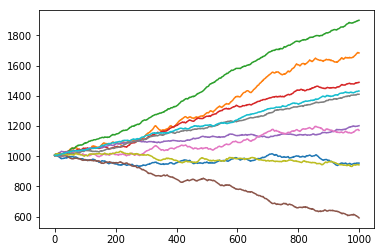

In [3]:
p_vec_0 = np.random.uniform(0,10,N_TS)+1000
Data = np.zeros((np.size(dataset['data'],axis=0),N_TS))
print(p_vec_0)
for j in range(N_TS):
    #print(p_vec_0[j])
    #print(np.cumsum(dataset['data'][:,j]))
    plt.plot(p_vec_0[j]+np.cumsum(dataset['data'][:,j]))
    Data[:,j] = p_vec_0[j]+np.cumsum(dataset['data'][:,j])
    
plt.show()

Train on 983 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.0498 - val_loss: 0.8383
Epoch 2/50
 - 0s - loss: 0.9965 - val_loss: 0.8654
Epoch 3/50
 - 0s - loss: 0.9696 - val_loss: 0.8859
Epoch 4/50
 - 0s - loss: 0.9539 - val_loss: 0.8839
Epoch 5/50
 - 0s - loss: 0.9435 - val_loss: 0.8770
Epoch 6/50
 - 0s - loss: 0.9357 - val_loss: 0.8755
Epoch 7/50
 - 0s - loss: 0.9289 - val_loss: 0.8763
Epoch 8/50
 - 0s - loss: 0.9231 - val_loss: 0.8769
Epoch 9/50
 - 0s - loss: 0.9181 - val_loss: 0.8782
Epoch 10/50
 - 0s - loss: 0.9136 - val_loss: 0.8810
Epoch 11/50
 - 0s - loss: 0.9089 - val_loss: 0.8834
Epoch 12/50
 - 0s - loss: 0.9047 - val_loss: 0.8870
Epoch 13/50
 - 0s - loss: 0.8999 - val_loss: 0.8903
Epoch 14/50
 - 0s - loss: 0.8954 - val_loss: 0.8908
Epoch 15/50
 - 0s - loss: 0.8910 - val_loss: 0.8912
Epoch 16/50
 - 0s - loss: 0.8865 - val_loss: 0.8925
Epoch 17/50
 - 0s - loss: 0.8819 - val_loss: 0.8951
Epoch 18/50
 - 0s - loss: 0.8771 - val_loss: 0.8955
Epoch 19/50
 - 0s - loss: 0.

Epoch 6/50
 - 0s - loss: 0.9406 - val_loss: 1.0688
Epoch 7/50
 - 0s - loss: 0.9358 - val_loss: 1.0774
Epoch 8/50
 - 0s - loss: 0.9312 - val_loss: 1.0848
Epoch 9/50
 - 0s - loss: 0.9270 - val_loss: 1.0904
Epoch 10/50
 - 0s - loss: 0.9230 - val_loss: 1.0966
Epoch 11/50
 - 0s - loss: 0.9191 - val_loss: 1.1010
Epoch 12/50
 - 0s - loss: 0.9154 - val_loss: 1.1049
Epoch 13/50
 - 0s - loss: 0.9118 - val_loss: 1.1063
Epoch 14/50
 - 0s - loss: 0.9077 - val_loss: 1.1102
Epoch 15/50
 - 0s - loss: 0.9041 - val_loss: 1.1085
Epoch 16/50
 - 0s - loss: 0.8999 - val_loss: 1.1117
Epoch 17/50
 - 0s - loss: 0.8960 - val_loss: 1.1133
Epoch 18/50
 - 0s - loss: 0.8919 - val_loss: 1.1170
Epoch 19/50
 - 0s - loss: 0.8882 - val_loss: 1.1196
Epoch 20/50
 - 0s - loss: 0.8840 - val_loss: 1.1213
Epoch 21/50
 - 0s - loss: 0.8800 - val_loss: 1.1244
Epoch 22/50
 - 0s - loss: 0.8759 - val_loss: 1.1235
Epoch 23/50
 - 0s - loss: 0.8724 - val_loss: 1.1335
Epoch 24/50
 - 0s - loss: 0.8687 - val_loss: 1.1323
Epoch 25/50
 - 0

Epoch 12/50
 - 0s - loss: 0.9892 - val_loss: 0.7085
Epoch 13/50
 - 0s - loss: 0.9854 - val_loss: 0.7068
Epoch 14/50
 - 0s - loss: 0.9814 - val_loss: 0.6985
Epoch 15/50
 - 0s - loss: 0.9774 - val_loss: 0.6954
Epoch 16/50
 - 0s - loss: 0.9733 - val_loss: 0.6918
Epoch 17/50
 - 0s - loss: 0.9692 - val_loss: 0.6846
Epoch 18/50
 - 0s - loss: 0.9650 - val_loss: 0.6794
Epoch 19/50
 - 0s - loss: 0.9609 - val_loss: 0.6757
Epoch 20/50
 - 0s - loss: 0.9563 - val_loss: 0.6688
Epoch 21/50
 - 0s - loss: 0.9517 - val_loss: 0.6659
Epoch 22/50
 - 0s - loss: 0.9472 - val_loss: 0.6627
Epoch 23/50
 - 0s - loss: 0.9427 - val_loss: 0.6586
Epoch 24/50
 - 0s - loss: 0.9385 - val_loss: 0.6613
Epoch 25/50
 - 0s - loss: 0.9338 - val_loss: 0.6546
Epoch 26/50
 - 0s - loss: 0.9293 - val_loss: 0.6570
Epoch 27/50
 - 0s - loss: 0.9245 - val_loss: 0.6554
Epoch 28/50
 - 0s - loss: 0.9197 - val_loss: 0.6527
Epoch 29/50
 - 0s - loss: 0.9147 - val_loss: 0.6625
Epoch 30/50
 - 0s - loss: 0.9103 - val_loss: 0.6545
Epoch 31/50


Epoch 18/50
 - 0s - loss: 0.8437 - val_loss: 0.6466
Epoch 19/50
 - 0s - loss: 0.8400 - val_loss: 0.6536
Epoch 20/50
 - 0s - loss: 0.8365 - val_loss: 0.6488
Epoch 21/50
 - 0s - loss: 0.8332 - val_loss: 0.6483
Epoch 22/50
 - 0s - loss: 0.8294 - val_loss: 0.6608
Epoch 23/50
 - 0s - loss: 0.8261 - val_loss: 0.6417
Epoch 24/50
 - 0s - loss: 0.8225 - val_loss: 0.6426
Epoch 25/50
 - 0s - loss: 0.8189 - val_loss: 0.6435
Epoch 26/50
 - 0s - loss: 0.8153 - val_loss: 0.6427
Epoch 27/50
 - 0s - loss: 0.8116 - val_loss: 0.6469
Epoch 28/50
 - 0s - loss: 0.8080 - val_loss: 0.6497
Epoch 29/50
 - 0s - loss: 0.8040 - val_loss: 0.6487
Epoch 30/50
 - 0s - loss: 0.8003 - val_loss: 0.6590
Epoch 31/50
 - 0s - loss: 0.7968 - val_loss: 0.6490
Epoch 32/50
 - 0s - loss: 0.7930 - val_loss: 0.6606
Epoch 33/50
 - 0s - loss: 0.7887 - val_loss: 0.6582
Epoch 34/50
 - 0s - loss: 0.7854 - val_loss: 0.6579
Epoch 35/50
 - 0s - loss: 0.7810 - val_loss: 0.6632
Epoch 36/50
 - 0s - loss: 0.7763 - val_loss: 0.6592
Epoch 37/50


Epoch 24/50
 - 0s - loss: 0.8332 - val_loss: 1.1490
Epoch 25/50
 - 0s - loss: 0.8283 - val_loss: 1.1491
Epoch 26/50
 - 0s - loss: 0.8241 - val_loss: 1.1532
Epoch 27/50
 - 0s - loss: 0.8195 - val_loss: 1.1532
Epoch 28/50
 - 0s - loss: 0.8149 - val_loss: 1.1543
Epoch 29/50
 - 0s - loss: 0.8104 - val_loss: 1.1565
Epoch 30/50
 - 0s - loss: 0.8058 - val_loss: 1.1485
Epoch 31/50
 - 0s - loss: 0.8009 - val_loss: 1.1562
Epoch 32/50
 - 0s - loss: 0.7971 - val_loss: 1.1504
Epoch 33/50
 - 0s - loss: 0.7920 - val_loss: 1.1403
Epoch 34/50
 - 0s - loss: 0.7876 - val_loss: 1.1539
Epoch 35/50
 - 0s - loss: 0.7833 - val_loss: 1.1524
Epoch 36/50
 - 0s - loss: 0.7783 - val_loss: 1.1466
Epoch 37/50
 - 0s - loss: 0.7740 - val_loss: 1.1520
Epoch 38/50
 - 0s - loss: 0.7695 - val_loss: 1.1500
Epoch 39/50
 - 0s - loss: 0.7645 - val_loss: 1.1598
Epoch 40/50
 - 0s - loss: 0.7602 - val_loss: 1.1584
Epoch 41/50
 - 0s - loss: 0.7554 - val_loss: 1.1475
Epoch 42/50
 - 0s - loss: 0.7511 - val_loss: 1.1615
Epoch 43/50


Epoch 30/50
 - 0s - loss: 0.8377 - val_loss: 0.8730
Epoch 31/50
 - 0s - loss: 0.8337 - val_loss: 0.8826
Epoch 32/50
 - 0s - loss: 0.8295 - val_loss: 0.8925
Epoch 33/50
 - 0s - loss: 0.8253 - val_loss: 0.8902
Epoch 34/50
 - 0s - loss: 0.8207 - val_loss: 0.8873
Epoch 35/50
 - 0s - loss: 0.8165 - val_loss: 0.9100
Epoch 36/50
 - 0s - loss: 0.8126 - val_loss: 0.9053
Epoch 37/50
 - 0s - loss: 0.8082 - val_loss: 0.8967
Epoch 38/50
 - 0s - loss: 0.8037 - val_loss: 0.9187
Epoch 39/50
 - 0s - loss: 0.7992 - val_loss: 0.9253
Epoch 40/50
 - 0s - loss: 0.7960 - val_loss: 0.9150
Epoch 41/50
 - 0s - loss: 0.7908 - val_loss: 0.9154
Epoch 42/50
 - 0s - loss: 0.7855 - val_loss: 0.9232
Epoch 43/50
 - 0s - loss: 0.7815 - val_loss: 0.9282
Epoch 44/50
 - 0s - loss: 0.7772 - val_loss: 0.9289
Epoch 45/50
 - 0s - loss: 0.7723 - val_loss: 0.9355
Epoch 46/50
 - 0s - loss: 0.7669 - val_loss: 0.9415
Epoch 47/50
 - 0s - loss: 0.7624 - val_loss: 0.9483
Epoch 48/50
 - 0s - loss: 0.7590 - val_loss: 0.9527
Epoch 49/50


Epoch 36/50
 - 0s - loss: 0.8393 - val_loss: 1.1155
Epoch 37/50
 - 0s - loss: 0.8356 - val_loss: 1.1253
Epoch 38/50
 - 0s - loss: 0.8303 - val_loss: 1.1227
Epoch 39/50
 - 0s - loss: 0.8262 - val_loss: 1.1327
Epoch 40/50
 - 0s - loss: 0.8213 - val_loss: 1.1310
Epoch 41/50
 - 0s - loss: 0.8166 - val_loss: 1.1298
Epoch 42/50
 - 0s - loss: 0.8115 - val_loss: 1.1359
Epoch 43/50
 - 0s - loss: 0.8069 - val_loss: 1.1381
Epoch 44/50
 - 0s - loss: 0.8024 - val_loss: 1.1320
Epoch 45/50
 - 0s - loss: 0.7976 - val_loss: 1.1454
Epoch 46/50
 - 0s - loss: 0.7932 - val_loss: 1.1375
Epoch 47/50
 - 0s - loss: 0.7888 - val_loss: 1.1477
Epoch 48/50
 - 0s - loss: 0.7837 - val_loss: 1.1527
Epoch 49/50
 - 0s - loss: 0.7791 - val_loss: 1.1431
Epoch 50/50
 - 0s - loss: 0.7744 - val_loss: 1.1383
Train on 984 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 0.9637 - val_loss: 0.6736
Epoch 2/50
 - 0s - loss: 0.9288 - val_loss: 0.6504
Epoch 3/50
 - 0s - loss: 0.9148 - val_loss: 0.6506
Epoch 4/50
 - 0s - los

Epoch 42/50
 - 0s - loss: 0.9837 - val_loss: 0.9532
Epoch 43/50
 - 0s - loss: 0.9800 - val_loss: 0.9586
Epoch 44/50
 - 0s - loss: 0.9765 - val_loss: 0.9576
Epoch 45/50
 - 0s - loss: 0.9720 - val_loss: 0.9581
Epoch 46/50
 - 0s - loss: 0.9682 - val_loss: 0.9553
Epoch 47/50
 - 0s - loss: 0.9640 - val_loss: 0.9598
Epoch 48/50
 - 0s - loss: 0.9595 - val_loss: 0.9570
Epoch 49/50
 - 0s - loss: 0.9563 - val_loss: 0.9625
Epoch 50/50
 - 0s - loss: 0.9512 - val_loss: 0.9615
Train on 985 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.1561 - val_loss: 1.0636
Epoch 2/50
 - 0s - loss: 1.0224 - val_loss: 0.9887
Epoch 3/50
 - 0s - loss: 0.9604 - val_loss: 1.0316
Epoch 4/50
 - 0s - loss: 0.9380 - val_loss: 1.0453
Epoch 5/50
 - 0s - loss: 0.9242 - val_loss: 1.0446
Epoch 6/50
 - 0s - loss: 0.9136 - val_loss: 1.0463
Epoch 7/50
 - 0s - loss: 0.9061 - val_loss: 1.0476
Epoch 8/50
 - 0s - loss: 0.9002 - val_loss: 1.0476
Epoch 9/50
 - 0s - loss: 0.8952 - val_loss: 1.0478
Epoch 10/50
 - 0s - loss: 0.

Epoch 48/50
 - 0s - loss: 0.6422 - val_loss: 1.1271
Epoch 49/50
 - 0s - loss: 0.6386 - val_loss: 1.1191
Epoch 50/50
 - 0s - loss: 0.6322 - val_loss: 1.1133
Train on 985 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.0490 - val_loss: 1.0316
Epoch 2/50
 - 0s - loss: 0.9695 - val_loss: 0.7861
Epoch 3/50
 - 0s - loss: 0.9467 - val_loss: 0.7357
Epoch 4/50
 - 0s - loss: 0.9400 - val_loss: 0.7573
Epoch 5/50
 - 0s - loss: 0.9330 - val_loss: 0.7683
Epoch 6/50
 - 0s - loss: 0.9280 - val_loss: 0.7698
Epoch 7/50
 - 0s - loss: 0.9236 - val_loss: 0.7722
Epoch 8/50
 - 0s - loss: 0.9196 - val_loss: 0.7748
Epoch 9/50
 - 0s - loss: 0.9156 - val_loss: 0.7821
Epoch 10/50
 - 0s - loss: 0.9119 - val_loss: 0.7815
Epoch 11/50
 - 0s - loss: 0.9083 - val_loss: 0.7851
Epoch 12/50
 - 0s - loss: 0.9047 - val_loss: 0.7860
Epoch 13/50
 - 0s - loss: 0.9012 - val_loss: 0.7855
Epoch 14/50
 - 0s - loss: 0.8977 - val_loss: 0.7907
Epoch 15/50
 - 0s - loss: 0.8944 - val_loss: 0.7904
Epoch 16/50
 - 0s - loss: 0.

Epoch 3/50
 - 0s - loss: 0.9872 - val_loss: 0.8876
Epoch 4/50
 - 0s - loss: 0.9767 - val_loss: 0.8851
Epoch 5/50
 - 0s - loss: 0.9679 - val_loss: 0.9037
Epoch 6/50
 - 0s - loss: 0.9602 - val_loss: 0.9225
Epoch 7/50
 - 0s - loss: 0.9544 - val_loss: 0.9432
Epoch 8/50
 - 0s - loss: 0.9496 - val_loss: 0.9562
Epoch 9/50
 - 0s - loss: 0.9456 - val_loss: 0.9760
Epoch 10/50
 - 0s - loss: 0.9419 - val_loss: 0.9821
Epoch 11/50
 - 0s - loss: 0.9383 - val_loss: 0.9993
Epoch 12/50
 - 0s - loss: 0.9348 - val_loss: 0.9962
Epoch 13/50
 - 0s - loss: 0.9312 - val_loss: 1.0104
Epoch 14/50
 - 0s - loss: 0.9280 - val_loss: 1.0093
Epoch 15/50
 - 0s - loss: 0.9246 - val_loss: 1.0163
Epoch 16/50
 - 0s - loss: 0.9216 - val_loss: 1.0206
Epoch 17/50
 - 0s - loss: 0.9182 - val_loss: 1.0250
Epoch 18/50
 - 0s - loss: 0.9148 - val_loss: 1.0230
Epoch 19/50
 - 0s - loss: 0.9117 - val_loss: 1.0214
Epoch 20/50
 - 0s - loss: 0.9081 - val_loss: 1.0297
Epoch 21/50
 - 0s - loss: 0.9049 - val_loss: 1.0235
Epoch 22/50
 - 0s -

Epoch 9/50
 - 0s - loss: 1.1049 - val_loss: 1.0520
Epoch 10/50
 - 0s - loss: 1.0994 - val_loss: 1.0565
Epoch 11/50
 - 0s - loss: 1.0943 - val_loss: 1.0626
Epoch 12/50
 - 0s - loss: 1.0895 - val_loss: 1.0661
Epoch 13/50
 - 0s - loss: 1.0854 - val_loss: 1.0727
Epoch 14/50
 - 0s - loss: 1.0815 - val_loss: 1.0772
Epoch 15/50
 - 0s - loss: 1.0775 - val_loss: 1.0763
Epoch 16/50
 - 0s - loss: 1.0741 - val_loss: 1.0796
Epoch 17/50
 - 0s - loss: 1.0705 - val_loss: 1.0817
Epoch 18/50
 - 0s - loss: 1.0675 - val_loss: 1.0820
Epoch 19/50
 - 0s - loss: 1.0644 - val_loss: 1.0820
Epoch 20/50
 - 0s - loss: 1.0612 - val_loss: 1.0835
Epoch 21/50
 - 0s - loss: 1.0581 - val_loss: 1.0810
Epoch 22/50
 - 0s - loss: 1.0551 - val_loss: 1.0843
Epoch 23/50
 - 0s - loss: 1.0518 - val_loss: 1.0796
Epoch 24/50
 - 0s - loss: 1.0485 - val_loss: 1.0819
Epoch 25/50
 - 0s - loss: 1.0451 - val_loss: 1.0828
Epoch 26/50
 - 0s - loss: 1.0413 - val_loss: 1.0841
Epoch 27/50
 - 0s - loss: 1.0373 - val_loss: 1.0786
Epoch 28/50
 

Epoch 15/50
 - 0s - loss: 0.7756 - val_loss: 0.8753
Epoch 16/50
 - 0s - loss: 0.7724 - val_loss: 0.8758
Epoch 17/50
 - 0s - loss: 0.7687 - val_loss: 0.8865
Epoch 18/50
 - 0s - loss: 0.7653 - val_loss: 0.8875
Epoch 19/50
 - 0s - loss: 0.7616 - val_loss: 0.8986
Epoch 20/50
 - 0s - loss: 0.7582 - val_loss: 0.8926
Epoch 21/50
 - 0s - loss: 0.7546 - val_loss: 0.8977
Epoch 22/50
 - 0s - loss: 0.7509 - val_loss: 0.9106
Epoch 23/50
 - 0s - loss: 0.7480 - val_loss: 0.9035
Epoch 24/50
 - 0s - loss: 0.7441 - val_loss: 0.8934
Epoch 25/50
 - 0s - loss: 0.7401 - val_loss: 0.9109
Epoch 26/50
 - 0s - loss: 0.7371 - val_loss: 0.9066
Epoch 27/50
 - 0s - loss: 0.7334 - val_loss: 0.9067
Epoch 28/50
 - 0s - loss: 0.7304 - val_loss: 0.8955
Epoch 29/50
 - 0s - loss: 0.7257 - val_loss: 0.9040
Epoch 30/50
 - 0s - loss: 0.7221 - val_loss: 0.9130
Epoch 31/50
 - 0s - loss: 0.7193 - val_loss: 0.8979
Epoch 32/50
 - 0s - loss: 0.7150 - val_loss: 0.9018
Epoch 33/50
 - 0s - loss: 0.7107 - val_loss: 0.9163
Epoch 34/50


Epoch 21/50
 - 0s - loss: 0.8307 - val_loss: 1.2006
Epoch 22/50
 - 0s - loss: 0.8259 - val_loss: 1.2032
Epoch 23/50
 - 0s - loss: 0.8209 - val_loss: 1.2056
Epoch 24/50
 - 0s - loss: 0.8165 - val_loss: 1.2096
Epoch 25/50
 - 0s - loss: 0.8114 - val_loss: 1.2167
Epoch 26/50
 - 0s - loss: 0.8058 - val_loss: 1.2145
Epoch 27/50
 - 0s - loss: 0.8005 - val_loss: 1.2236
Epoch 28/50
 - 0s - loss: 0.7960 - val_loss: 1.2312
Epoch 29/50
 - 0s - loss: 0.7899 - val_loss: 1.2349
Epoch 30/50
 - 0s - loss: 0.7847 - val_loss: 1.2386
Epoch 31/50
 - 0s - loss: 0.7805 - val_loss: 1.2547
Epoch 32/50
 - 0s - loss: 0.7741 - val_loss: 1.2594
Epoch 33/50
 - 0s - loss: 0.7689 - val_loss: 1.2639
Epoch 34/50
 - 0s - loss: 0.7654 - val_loss: 1.2830
Epoch 35/50
 - 0s - loss: 0.7583 - val_loss: 1.2921
Epoch 36/50
 - 0s - loss: 0.7526 - val_loss: 1.2931
Epoch 37/50
 - 0s - loss: 0.7483 - val_loss: 1.3009
Epoch 38/50
 - 0s - loss: 0.7435 - val_loss: 1.3183
Epoch 39/50
 - 0s - loss: 0.7365 - val_loss: 1.3237
Epoch 40/50


Epoch 27/50
 - 0s - loss: 0.8365 - val_loss: 0.8073
Epoch 28/50
 - 0s - loss: 0.8333 - val_loss: 0.7995
Epoch 29/50
 - 0s - loss: 0.8279 - val_loss: 0.7992
Epoch 30/50
 - 0s - loss: 0.8239 - val_loss: 0.8041
Epoch 31/50
 - 0s - loss: 0.8188 - val_loss: 0.8050
Epoch 32/50
 - 0s - loss: 0.8143 - val_loss: 0.8018
Epoch 33/50
 - 0s - loss: 0.8097 - val_loss: 0.8069
Epoch 34/50
 - 0s - loss: 0.8052 - val_loss: 0.8034
Epoch 35/50
 - 0s - loss: 0.8002 - val_loss: 0.8076
Epoch 36/50
 - 0s - loss: 0.7947 - val_loss: 0.8095
Epoch 37/50
 - 0s - loss: 0.7892 - val_loss: 0.8108
Epoch 38/50
 - 0s - loss: 0.7885 - val_loss: 0.7993
Epoch 39/50
 - 0s - loss: 0.7790 - val_loss: 0.7996
Epoch 40/50
 - 0s - loss: 0.7738 - val_loss: 0.8040
Epoch 41/50
 - 0s - loss: 0.7705 - val_loss: 0.7944
Epoch 42/50
 - 0s - loss: 0.7654 - val_loss: 0.7938
Epoch 43/50
 - 0s - loss: 0.7582 - val_loss: 0.8072
Epoch 44/50
 - 0s - loss: 0.7553 - val_loss: 0.7962
Epoch 45/50
 - 0s - loss: 0.7515 - val_loss: 0.7957
Epoch 46/50


Epoch 33/50
 - 0s - loss: 0.8335 - val_loss: 0.9279
Epoch 34/50
 - 0s - loss: 0.8288 - val_loss: 0.9428
Epoch 35/50
 - 0s - loss: 0.8234 - val_loss: 0.9382
Epoch 36/50
 - 0s - loss: 0.8197 - val_loss: 0.9522
Epoch 37/50
 - 0s - loss: 0.8145 - val_loss: 0.9550
Epoch 38/50
 - 0s - loss: 0.8092 - val_loss: 0.9649
Epoch 39/50
 - 0s - loss: 0.8047 - val_loss: 0.9767
Epoch 40/50
 - 0s - loss: 0.8005 - val_loss: 0.9868
Epoch 41/50
 - 0s - loss: 0.7946 - val_loss: 0.9959
Epoch 42/50
 - 0s - loss: 0.7897 - val_loss: 1.0028
Epoch 43/50
 - 0s - loss: 0.7863 - val_loss: 1.0014
Epoch 44/50
 - 0s - loss: 0.7822 - val_loss: 1.0162
Epoch 45/50
 - 0s - loss: 0.7762 - val_loss: 1.0155
Epoch 46/50
 - 0s - loss: 0.7723 - val_loss: 1.0241
Epoch 47/50
 - 0s - loss: 0.7687 - val_loss: 1.0334
Epoch 48/50
 - 0s - loss: 0.7625 - val_loss: 1.0312
Epoch 49/50
 - 0s - loss: 0.7589 - val_loss: 1.0295
Epoch 50/50
 - 0s - loss: 0.7575 - val_loss: 1.0366
Train on 987 samples, validate on 10 samples
Epoch 1/50
 - 0s - 

Epoch 39/50
 - 0s - loss: 0.8780 - val_loss: 0.7607
Epoch 40/50
 - 0s - loss: 0.8737 - val_loss: 0.7693
Epoch 41/50
 - 0s - loss: 0.8688 - val_loss: 0.7709
Epoch 42/50
 - 0s - loss: 0.8641 - val_loss: 0.7711
Epoch 43/50
 - 0s - loss: 0.8597 - val_loss: 0.7625
Epoch 44/50
 - 0s - loss: 0.8546 - val_loss: 0.7634
Epoch 45/50
 - 0s - loss: 0.8497 - val_loss: 0.7496
Epoch 46/50
 - 0s - loss: 0.8452 - val_loss: 0.7727
Epoch 47/50
 - 0s - loss: 0.8402 - val_loss: 0.7720
Epoch 48/50
 - 0s - loss: 0.8357 - val_loss: 0.7553
Epoch 49/50
 - 0s - loss: 0.8305 - val_loss: 0.7437
Epoch 50/50
 - 0s - loss: 0.8253 - val_loss: 0.7436
Train on 987 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 0.9705 - val_loss: 1.0143
Epoch 2/50
 - 0s - loss: 0.9343 - val_loss: 1.0249
Epoch 3/50
 - 0s - loss: 0.9195 - val_loss: 1.0309
Epoch 4/50
 - 0s - loss: 0.9102 - val_loss: 1.0374
Epoch 5/50
 - 0s - loss: 0.9045 - val_loss: 1.0464
Epoch 6/50
 - 0s - loss: 0.8998 - val_loss: 1.0567
Epoch 7/50
 - 0s - loss: 

Epoch 45/50
 - 0s - loss: 0.7286 - val_loss: 0.4517
Epoch 46/50
 - 0s - loss: 0.7264 - val_loss: 0.4460
Epoch 47/50
 - 0s - loss: 0.7214 - val_loss: 0.4520
Epoch 48/50
 - 0s - loss: 0.7156 - val_loss: 0.4466
Epoch 49/50
 - 0s - loss: 0.7115 - val_loss: 0.4542
Epoch 50/50
 - 0s - loss: 0.7081 - val_loss: 0.4515


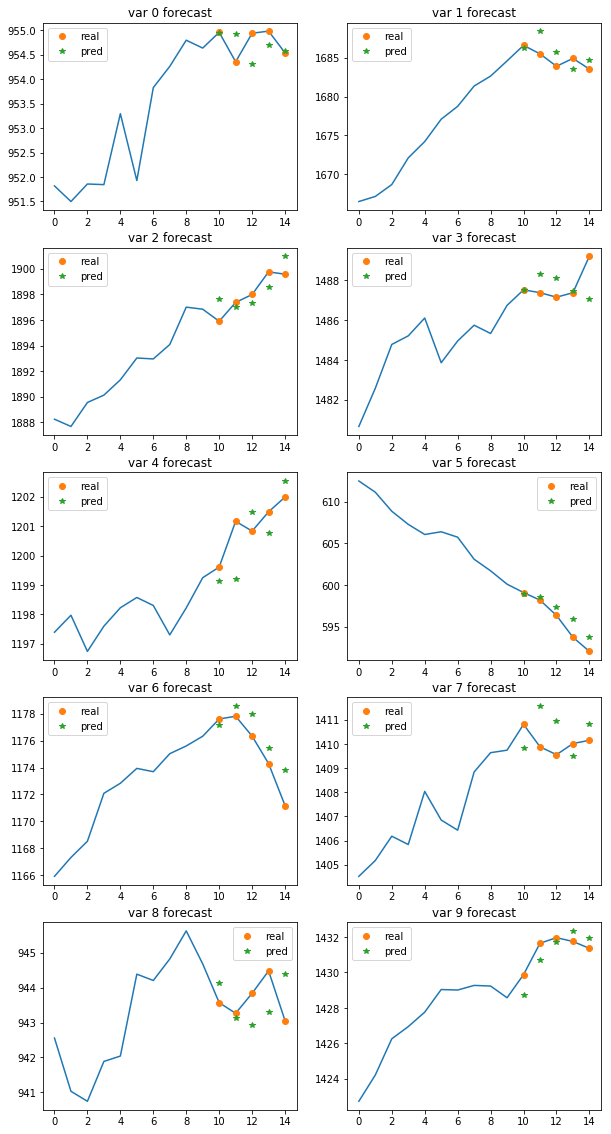

In [5]:
Ypred, Val_pred, Val_real = pred_regression_methods(Data,dataset['data'],
                                N_test=N_pred,
                                method = 'LSTM',
                                N_val = 10,
                                pred_meth = 'rolling',
                                p = 2,
                                plot=True)

In [5]:
print(Ypred)

[[-1.15960869  0.33375112 -0.95974705  0.25968871 -0.40284084  0.17452974
   0.40778747 -0.49884725  0.25140185 -0.02470558]
 [-1.24926566  0.29977252 -0.9831756   0.2478033  -0.27725972  0.22014943
   0.43684945 -0.49920451  0.38058332 -0.01600479]
 [-1.12042481  0.42051914 -0.88459557  0.23886332 -0.22630452  0.19005588
   0.43391675 -0.56936368  0.25852782 -0.02879425]
 [-1.12008744  0.45007428 -0.93237822  0.2581899  -0.17860688  0.204237
   0.44576581 -0.48519149  0.23820015 -0.01926817]
 [-1.06564889  0.39376459 -0.84895088  0.23181604 -0.19219159  0.18509648
   0.44758325 -0.44526793  0.2384889  -0.02283011]]


In [7]:
print(Val_pred, Val_real)

[[2062.99096337  861.54359152 1568.95184555  367.36282188 1398.33478995
   988.8354899   505.52881201   26.90022324 1894.78335582 1453.8208573 ]
 [2064.11322562  863.657556   1569.28422037  365.39910884 1398.13985604
   987.68246792  504.94029316   26.39626912 1896.98830336 1454.7137443 ]
 [2063.869828    863.62240959 1568.32209405  366.64639369 1397.00554909
   988.40303437  503.75181891   25.8830403  1896.22475001 1453.45943043]
 [2067.1914602   863.99322775 1569.36394523  368.53042409 1395.65367229
   988.4495251   501.80896575   27.5012539  1895.31072143 1454.30109855]
 [2067.77960485  863.22895099 1569.11707198  368.1327373  1394.98121734
   988.65461727  502.18028801   27.49781214 1893.93341768 1456.05227671]] [[2063.04034949  863.78855943 1568.6748962   366.02728238 1397.7340976
   987.72690916  505.42765173   27.4415395  1896.08265329 1454.21537213]
 [2062.80232874  863.7365742  1567.81642297  367.31432811 1396.59863984
   988.39702631  504.2115486    26.78398527 1895.40257029 

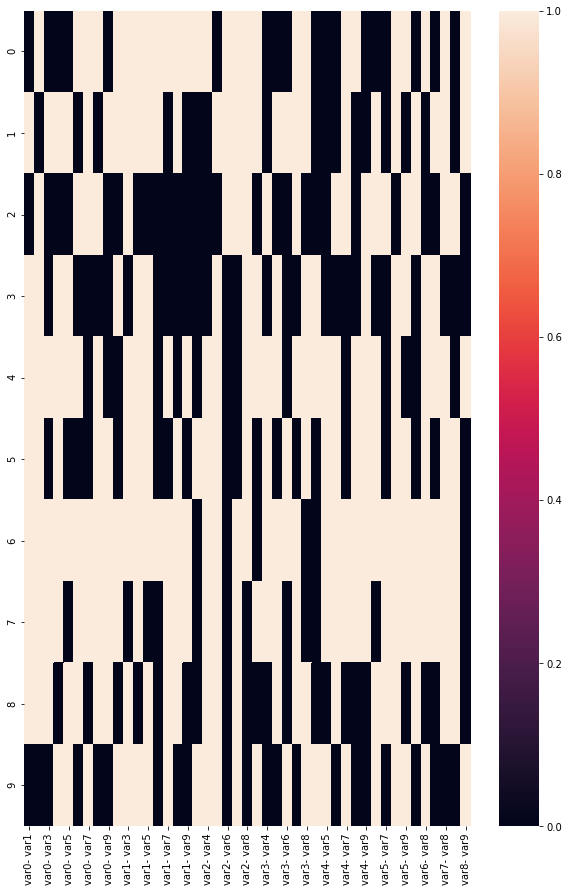

In [5]:
plt.figure(figsize=(10,15))

df_pred, df_real,df_res, hit_mean, hit_per_spread =spread_pred_interpretation(Ylgb, Y_real,plot=True)

In [6]:
print('Mean Hit', hit_mean)
print('Hit per spread', hit_per_spread)

Mean Hit 0.5955555555555555
Hit per spread [0.7 0.8 0.5 0.7 0.6 0.6 0.6 0.7 0.5 0.6 0.8 0.8 0.8 0.3 0.6 0.6 0.4 0.3
 0.7 0.8 0.3 0.7 0.7 0.6 0.5 0.6 0.4 0.7 0.7 0.3 0.5 0.6 0.6 0.5 0.6 0.7
 0.4 0.9 0.7 0.5 0.7 0.5 0.8 0.5 0.4]


In [7]:
print('The rmse of prediction is:', mean_squared_error(MultiY[(np.size(X,axis=0) - N_pred):,:], Ylgb) ** 0.5)
print('The mae of prediction is:', mean_absolute_error(MultiY[(np.size(X,axis=0) - N_pred):,:], Ylgb))

The rmse of prediction is: 1.255778228381633
The mae of prediction is: 0.9697536120100313


In [8]:
YLSTM = pred_LSTM(X, MultiY,N_test = N_pred)

Train on 658 samples, validate on 330 samples
Epoch 1/50
 - 0s - loss: 1.1153 - val_loss: 1.1973
Epoch 2/50
 - 0s - loss: 1.0877 - val_loss: 1.1797
Epoch 3/50
 - 0s - loss: 1.0705 - val_loss: 1.1679
Epoch 4/50
 - 0s - loss: 1.0592 - val_loss: 1.1612
Epoch 5/50
 - 0s - loss: 1.0523 - val_loss: 1.1574
Epoch 6/50
 - 0s - loss: 1.0468 - val_loss: 1.1563
Epoch 7/50
 - 0s - loss: 1.0415 - val_loss: 1.1551
Epoch 8/50
 - 0s - loss: 1.0365 - val_loss: 1.1551
Epoch 9/50
 - 0s - loss: 1.0316 - val_loss: 1.1558
Epoch 10/50
 - 0s - loss: 1.0267 - val_loss: 1.1590
Epoch 11/50
 - 0s - loss: 1.0219 - val_loss: 1.1609
Epoch 12/50
 - 0s - loss: 1.0179 - val_loss: 1.1613
Epoch 13/50
 - 0s - loss: 1.0134 - val_loss: 1.1646
Epoch 14/50
 - 0s - loss: 1.0091 - val_loss: 1.1654
Epoch 15/50
 - 0s - loss: 1.0051 - val_loss: 1.1676
Epoch 16/50
 - 0s - loss: 1.0015 - val_loss: 1.1681
Epoch 17/50
 - 0s - loss: 0.9977 - val_loss: 1.1702
Epoch 18/50
 - 0s - loss: 0.9941 - val_loss: 1.1700
Epoch 19/50
 - 0s - loss: 0

Epoch 6/50
 - 0s - loss: 1.0206 - val_loss: 0.9990
Epoch 7/50
 - 0s - loss: 1.0142 - val_loss: 0.9979
Epoch 8/50
 - 0s - loss: 1.0086 - val_loss: 0.9973
Epoch 9/50
 - 0s - loss: 1.0042 - val_loss: 0.9970
Epoch 10/50
 - 0s - loss: 0.9999 - val_loss: 0.9970
Epoch 11/50
 - 0s - loss: 0.9956 - val_loss: 0.9975
Epoch 12/50
 - 0s - loss: 0.9916 - val_loss: 0.9981
Epoch 13/50
 - 0s - loss: 0.9876 - val_loss: 0.9982
Epoch 14/50
 - 0s - loss: 0.9838 - val_loss: 0.9990
Epoch 15/50
 - 0s - loss: 0.9797 - val_loss: 1.0000
Epoch 16/50
 - 0s - loss: 0.9755 - val_loss: 1.0006
Epoch 17/50
 - 0s - loss: 0.9715 - val_loss: 1.0011
Epoch 18/50
 - 0s - loss: 0.9671 - val_loss: 1.0008
Epoch 19/50
 - 0s - loss: 0.9627 - val_loss: 1.0015
Epoch 20/50
 - 0s - loss: 0.9581 - val_loss: 1.0011
Epoch 21/50
 - 0s - loss: 0.9545 - val_loss: 1.0026
Epoch 22/50
 - 0s - loss: 0.9503 - val_loss: 1.0018
Epoch 23/50
 - 0s - loss: 0.9463 - val_loss: 1.0026
Epoch 24/50
 - 0s - loss: 0.9431 - val_loss: 1.0026
Epoch 25/50
 - 0

Epoch 12/50
 - 0s - loss: 1.0273 - val_loss: 1.1404
Epoch 13/50
 - 0s - loss: 1.0235 - val_loss: 1.1413
Epoch 14/50
 - 0s - loss: 1.0201 - val_loss: 1.1414
Epoch 15/50
 - 0s - loss: 1.0166 - val_loss: 1.1412
Epoch 16/50
 - 0s - loss: 1.0136 - val_loss: 1.1408
Epoch 17/50
 - 0s - loss: 1.0095 - val_loss: 1.1410
Epoch 18/50
 - 0s - loss: 1.0057 - val_loss: 1.1426
Epoch 19/50
 - 0s - loss: 1.0021 - val_loss: 1.1416
Epoch 20/50
 - 0s - loss: 0.9983 - val_loss: 1.1423
Epoch 21/50
 - 0s - loss: 0.9945 - val_loss: 1.1430
Epoch 22/50
 - 0s - loss: 0.9905 - val_loss: 1.1433
Epoch 23/50
 - 0s - loss: 0.9864 - val_loss: 1.1439
Epoch 24/50
 - 0s - loss: 0.9819 - val_loss: 1.1447
Epoch 25/50
 - 0s - loss: 0.9780 - val_loss: 1.1452
Epoch 26/50
 - 0s - loss: 0.9737 - val_loss: 1.1467
Epoch 27/50
 - 0s - loss: 0.9700 - val_loss: 1.1475
Epoch 28/50
 - 0s - loss: 0.9660 - val_loss: 1.1493
Epoch 29/50
 - 0s - loss: 0.9631 - val_loss: 1.1491
Epoch 30/50
 - 0s - loss: 0.9602 - val_loss: 1.1484
Epoch 31/50


Epoch 18/50
 - 0s - loss: 0.9128 - val_loss: 1.0206
Epoch 19/50
 - 0s - loss: 0.9092 - val_loss: 1.0226
Epoch 20/50
 - 0s - loss: 0.9055 - val_loss: 1.0237
Epoch 21/50
 - 0s - loss: 0.9018 - val_loss: 1.0245
Epoch 22/50
 - 0s - loss: 0.8983 - val_loss: 1.0262
Epoch 23/50
 - 0s - loss: 0.8947 - val_loss: 1.0274
Epoch 24/50
 - 0s - loss: 0.8911 - val_loss: 1.0291
Epoch 25/50
 - 0s - loss: 0.8871 - val_loss: 1.0296
Epoch 26/50
 - 0s - loss: 0.8837 - val_loss: 1.0333
Epoch 27/50
 - 0s - loss: 0.8791 - val_loss: 1.0318
Epoch 28/50
 - 0s - loss: 0.8752 - val_loss: 1.0345
Epoch 29/50
 - 0s - loss: 0.8703 - val_loss: 1.0383
Epoch 30/50
 - 0s - loss: 0.8654 - val_loss: 1.0373
Epoch 31/50
 - 0s - loss: 0.8618 - val_loss: 1.0385
Epoch 32/50
 - 0s - loss: 0.8575 - val_loss: 1.0404
Epoch 33/50
 - 0s - loss: 0.8525 - val_loss: 1.0419
Epoch 34/50
 - 0s - loss: 0.8478 - val_loss: 1.0419
Epoch 35/50
 - 0s - loss: 0.8431 - val_loss: 1.0423
Epoch 36/50
 - 0s - loss: 0.8387 - val_loss: 1.0424
Epoch 37/50


Epoch 24/50
 - 0s - loss: 1.0458 - val_loss: 1.1256
Epoch 25/50
 - 0s - loss: 1.0415 - val_loss: 1.1253
Epoch 26/50
 - 0s - loss: 1.0380 - val_loss: 1.1259
Epoch 27/50
 - 0s - loss: 1.0325 - val_loss: 1.1260
Epoch 28/50
 - 0s - loss: 1.0280 - val_loss: 1.1259
Epoch 29/50
 - 0s - loss: 1.0240 - val_loss: 1.1263
Epoch 30/50
 - 0s - loss: 1.0187 - val_loss: 1.1270
Epoch 31/50
 - 0s - loss: 1.0141 - val_loss: 1.1268
Epoch 32/50
 - 0s - loss: 1.0097 - val_loss: 1.1275
Epoch 33/50
 - 0s - loss: 1.0053 - val_loss: 1.1288
Epoch 34/50
 - 0s - loss: 0.9996 - val_loss: 1.1288
Epoch 35/50
 - 0s - loss: 0.9942 - val_loss: 1.1318
Epoch 36/50
 - 0s - loss: 0.9898 - val_loss: 1.1323
Epoch 37/50
 - 0s - loss: 0.9848 - val_loss: 1.1331
Epoch 38/50
 - 0s - loss: 0.9790 - val_loss: 1.1357
Epoch 39/50
 - 0s - loss: 0.9762 - val_loss: 1.1381
Epoch 40/50
 - 0s - loss: 0.9692 - val_loss: 1.1366
Epoch 41/50
 - 0s - loss: 0.9649 - val_loss: 1.1395
Epoch 42/50
 - 0s - loss: 0.9597 - val_loss: 1.1385
Epoch 43/50


Epoch 30/50
 - 0s - loss: 0.8995 - val_loss: 1.1283
Epoch 31/50
 - 0s - loss: 0.8960 - val_loss: 1.1297
Epoch 32/50
 - 0s - loss: 0.8920 - val_loss: 1.1323
Epoch 33/50
 - 0s - loss: 0.8880 - val_loss: 1.1327
Epoch 34/50
 - 0s - loss: 0.8845 - val_loss: 1.1332
Epoch 35/50
 - 0s - loss: 0.8796 - val_loss: 1.1329
Epoch 36/50
 - 0s - loss: 0.8772 - val_loss: 1.1372
Epoch 37/50
 - 0s - loss: 0.8722 - val_loss: 1.1386
Epoch 38/50
 - 0s - loss: 0.8688 - val_loss: 1.1375
Epoch 39/50
 - 0s - loss: 0.8646 - val_loss: 1.1394
Epoch 40/50
 - 0s - loss: 0.8609 - val_loss: 1.1422
Epoch 41/50
 - 0s - loss: 0.8575 - val_loss: 1.1431
Epoch 42/50
 - 0s - loss: 0.8550 - val_loss: 1.1484
Epoch 43/50
 - 0s - loss: 0.8487 - val_loss: 1.1491
Epoch 44/50
 - 0s - loss: 0.8465 - val_loss: 1.1478
Epoch 45/50
 - 0s - loss: 0.8431 - val_loss: 1.1521
Epoch 46/50
 - 0s - loss: 0.8370 - val_loss: 1.1532
Epoch 47/50
 - 0s - loss: 0.8339 - val_loss: 1.1559
Epoch 48/50
 - 0s - loss: 0.8296 - val_loss: 1.1553
Epoch 49/50


Epoch 36/50
 - 0s - loss: 0.7242 - val_loss: 0.9171
Epoch 37/50
 - 0s - loss: 0.7212 - val_loss: 0.9185
Epoch 38/50
 - 0s - loss: 0.7172 - val_loss: 0.9213
Epoch 39/50
 - 0s - loss: 0.7150 - val_loss: 0.9214
Epoch 40/50
 - 0s - loss: 0.7099 - val_loss: 0.9224
Epoch 41/50
 - 0s - loss: 0.7056 - val_loss: 0.9246
Epoch 42/50
 - 0s - loss: 0.7020 - val_loss: 0.9254
Epoch 43/50
 - 0s - loss: 0.6989 - val_loss: 0.9261
Epoch 44/50
 - 0s - loss: 0.6948 - val_loss: 0.9261
Epoch 45/50
 - 0s - loss: 0.6915 - val_loss: 0.9278
Epoch 46/50
 - 0s - loss: 0.6874 - val_loss: 0.9278
Epoch 47/50
 - 0s - loss: 0.6850 - val_loss: 0.9297
Epoch 48/50
 - 0s - loss: 0.6805 - val_loss: 0.9298
Epoch 49/50
 - 0s - loss: 0.6770 - val_loss: 0.9307
Epoch 50/50
 - 0s - loss: 0.6739 - val_loss: 0.9314
Train on 659 samples, validate on 330 samples
Epoch 1/50
 - 0s - loss: 1.0556 - val_loss: 1.0402
Epoch 2/50
 - 0s - loss: 1.0244 - val_loss: 1.0228
Epoch 3/50
 - 0s - loss: 1.0020 - val_loss: 1.0133
Epoch 4/50
 - 0s - lo

Epoch 42/50
 - 0s - loss: 1.0054 - val_loss: 1.2547
Epoch 43/50
 - 0s - loss: 1.0020 - val_loss: 1.2591
Epoch 44/50
 - 0s - loss: 0.9973 - val_loss: 1.2581
Epoch 45/50
 - 0s - loss: 0.9902 - val_loss: 1.2592
Epoch 46/50
 - 0s - loss: 0.9855 - val_loss: 1.2627
Epoch 47/50
 - 0s - loss: 0.9799 - val_loss: 1.2635
Epoch 48/50
 - 0s - loss: 0.9749 - val_loss: 1.2628
Epoch 49/50
 - 0s - loss: 0.9703 - val_loss: 1.2643
Epoch 50/50
 - 0s - loss: 0.9640 - val_loss: 1.2690
Train on 660 samples, validate on 330 samples
Epoch 1/50
 - 0s - loss: 1.3143 - val_loss: 1.3239
Epoch 2/50
 - 0s - loss: 1.2663 - val_loss: 1.2755
Epoch 3/50
 - 0s - loss: 1.2277 - val_loss: 1.2359
Epoch 4/50
 - 0s - loss: 1.1999 - val_loss: 1.2050
Epoch 5/50
 - 0s - loss: 1.1786 - val_loss: 1.1810
Epoch 6/50
 - 0s - loss: 1.1633 - val_loss: 1.1661
Epoch 7/50
 - 0s - loss: 1.1509 - val_loss: 1.1555
Epoch 8/50
 - 0s - loss: 1.1393 - val_loss: 1.1465
Epoch 9/50
 - 0s - loss: 1.1294 - val_loss: 1.1395
Epoch 10/50
 - 0s - loss: 1

Epoch 48/50
 - 0s - loss: 0.7395 - val_loss: 0.9213
Epoch 49/50
 - 0s - loss: 0.7364 - val_loss: 0.9215
Epoch 50/50
 - 0s - loss: 0.7307 - val_loss: 0.9240
Train on 660 samples, validate on 330 samples
Epoch 1/50
 - 0s - loss: 1.0413 - val_loss: 1.1142
Epoch 2/50
 - 0s - loss: 1.0234 - val_loss: 1.1096
Epoch 3/50
 - 0s - loss: 1.0129 - val_loss: 1.1076
Epoch 4/50
 - 0s - loss: 1.0054 - val_loss: 1.1056
Epoch 5/50
 - 0s - loss: 0.9987 - val_loss: 1.1045
Epoch 6/50
 - 0s - loss: 0.9934 - val_loss: 1.1044
Epoch 7/50
 - 0s - loss: 0.9895 - val_loss: 1.1047
Epoch 8/50
 - 0s - loss: 0.9859 - val_loss: 1.1049
Epoch 9/50
 - 0s - loss: 0.9825 - val_loss: 1.1056
Epoch 10/50
 - 0s - loss: 0.9797 - val_loss: 1.1056
Epoch 11/50
 - 0s - loss: 0.9766 - val_loss: 1.1068
Epoch 12/50
 - 0s - loss: 0.9735 - val_loss: 1.1074
Epoch 13/50
 - 0s - loss: 0.9705 - val_loss: 1.1083
Epoch 14/50
 - 0s - loss: 0.9672 - val_loss: 1.1084
Epoch 15/50
 - 0s - loss: 0.9642 - val_loss: 1.1085
Epoch 16/50
 - 0s - loss: 0

Epoch 3/50
 - 0s - loss: 1.0800 - val_loss: 1.0861
Epoch 4/50
 - 0s - loss: 1.0117 - val_loss: 1.0267
Epoch 5/50
 - 0s - loss: 0.9547 - val_loss: 0.9837
Epoch 6/50
 - 0s - loss: 0.9066 - val_loss: 0.9531
Epoch 7/50
 - 0s - loss: 0.8722 - val_loss: 0.9340
Epoch 8/50
 - 0s - loss: 0.8512 - val_loss: 0.9246
Epoch 9/50
 - 0s - loss: 0.8399 - val_loss: 0.9208
Epoch 10/50
 - 0s - loss: 0.8324 - val_loss: 0.9196
Epoch 11/50
 - 0s - loss: 0.8262 - val_loss: 0.9176
Epoch 12/50
 - 0s - loss: 0.8205 - val_loss: 0.9155
Epoch 13/50
 - 0s - loss: 0.8154 - val_loss: 0.9145
Epoch 14/50
 - 0s - loss: 0.8108 - val_loss: 0.9140
Epoch 15/50
 - 0s - loss: 0.8062 - val_loss: 0.9128
Epoch 16/50
 - 0s - loss: 0.8017 - val_loss: 0.9125
Epoch 17/50
 - 0s - loss: 0.7976 - val_loss: 0.9118
Epoch 18/50
 - 0s - loss: 0.7938 - val_loss: 0.9120
Epoch 19/50
 - 0s - loss: 0.7903 - val_loss: 0.9107
Epoch 20/50
 - 0s - loss: 0.7863 - val_loss: 0.9103
Epoch 21/50
 - 0s - loss: 0.7825 - val_loss: 0.9094
Epoch 22/50
 - 0s -

Epoch 9/50
 - 0s - loss: 1.1929 - val_loss: 1.2579
Epoch 10/50
 - 0s - loss: 1.1838 - val_loss: 1.2470
Epoch 11/50
 - 0s - loss: 1.1762 - val_loss: 1.2399
Epoch 12/50
 - 0s - loss: 1.1698 - val_loss: 1.2349
Epoch 13/50
 - 0s - loss: 1.1648 - val_loss: 1.2318
Epoch 14/50
 - 0s - loss: 1.1599 - val_loss: 1.2302
Epoch 15/50
 - 0s - loss: 1.1551 - val_loss: 1.2289
Epoch 16/50
 - 0s - loss: 1.1499 - val_loss: 1.2268
Epoch 17/50
 - 0s - loss: 1.1446 - val_loss: 1.2254
Epoch 18/50
 - 0s - loss: 1.1397 - val_loss: 1.2245
Epoch 19/50
 - 0s - loss: 1.1345 - val_loss: 1.2232
Epoch 20/50
 - 0s - loss: 1.1298 - val_loss: 1.2231
Epoch 21/50
 - 0s - loss: 1.1250 - val_loss: 1.2234
Epoch 22/50
 - 0s - loss: 1.1199 - val_loss: 1.2234
Epoch 23/50
 - 0s - loss: 1.1147 - val_loss: 1.2233
Epoch 24/50
 - 0s - loss: 1.1096 - val_loss: 1.2238
Epoch 25/50
 - 0s - loss: 1.1045 - val_loss: 1.2241
Epoch 26/50
 - 0s - loss: 1.0989 - val_loss: 1.2243
Epoch 27/50
 - 0s - loss: 1.0930 - val_loss: 1.2243
Epoch 28/50
 

Epoch 15/50
 - 0s - loss: 0.8954 - val_loss: 0.8910
Epoch 16/50
 - 0s - loss: 0.8911 - val_loss: 0.8915
Epoch 17/50
 - 0s - loss: 0.8872 - val_loss: 0.8931
Epoch 18/50
 - 0s - loss: 0.8832 - val_loss: 0.8942
Epoch 19/50
 - 0s - loss: 0.8789 - val_loss: 0.8956
Epoch 20/50
 - 0s - loss: 0.8750 - val_loss: 0.8983
Epoch 21/50
 - 0s - loss: 0.8711 - val_loss: 0.8999
Epoch 22/50
 - 0s - loss: 0.8669 - val_loss: 0.9000
Epoch 23/50
 - 0s - loss: 0.8630 - val_loss: 0.9005
Epoch 24/50
 - 0s - loss: 0.8586 - val_loss: 0.8981
Epoch 25/50
 - 0s - loss: 0.8548 - val_loss: 0.8987
Epoch 26/50
 - 0s - loss: 0.8510 - val_loss: 0.9001
Epoch 27/50
 - 0s - loss: 0.8472 - val_loss: 0.9010
Epoch 28/50
 - 0s - loss: 0.8429 - val_loss: 0.9001
Epoch 29/50
 - 0s - loss: 0.8392 - val_loss: 0.9011
Epoch 30/50
 - 0s - loss: 0.8351 - val_loss: 0.9019
Epoch 31/50
 - 0s - loss: 0.8311 - val_loss: 0.9007
Epoch 32/50
 - 0s - loss: 0.8274 - val_loss: 0.9027
Epoch 33/50
 - 0s - loss: 0.8238 - val_loss: 0.9034
Epoch 34/50


Epoch 21/50
 - 0s - loss: 0.7575 - val_loss: 0.8631
Epoch 22/50
 - 0s - loss: 0.7545 - val_loss: 0.8628
Epoch 23/50
 - 0s - loss: 0.7512 - val_loss: 0.8654
Epoch 24/50
 - 0s - loss: 0.7488 - val_loss: 0.8668
Epoch 25/50
 - 0s - loss: 0.7455 - val_loss: 0.8660
Epoch 26/50
 - 0s - loss: 0.7428 - val_loss: 0.8669
Epoch 27/50
 - 0s - loss: 0.7403 - val_loss: 0.8695
Epoch 28/50
 - 0s - loss: 0.7368 - val_loss: 0.8667
Epoch 29/50
 - 0s - loss: 0.7336 - val_loss: 0.8712
Epoch 30/50
 - 0s - loss: 0.7306 - val_loss: 0.8717
Epoch 31/50
 - 0s - loss: 0.7279 - val_loss: 0.8732
Epoch 32/50
 - 0s - loss: 0.7247 - val_loss: 0.8744
Epoch 33/50
 - 0s - loss: 0.7215 - val_loss: 0.8731
Epoch 34/50
 - 0s - loss: 0.7179 - val_loss: 0.8782
Epoch 35/50
 - 0s - loss: 0.7162 - val_loss: 0.8780
Epoch 36/50
 - 0s - loss: 0.7129 - val_loss: 0.8778
Epoch 37/50
 - 0s - loss: 0.7095 - val_loss: 0.8830
Epoch 38/50
 - 0s - loss: 0.7067 - val_loss: 0.8812
Epoch 39/50
 - 0s - loss: 0.7043 - val_loss: 0.8823
Epoch 40/50


Epoch 27/50
 - 0s - loss: 0.9698 - val_loss: 1.1898
Epoch 28/50
 - 0s - loss: 0.9662 - val_loss: 1.1902
Epoch 29/50
 - 0s - loss: 0.9629 - val_loss: 1.1920
Epoch 30/50
 - 0s - loss: 0.9594 - val_loss: 1.1941
Epoch 31/50
 - 0s - loss: 0.9559 - val_loss: 1.1956
Epoch 32/50
 - 0s - loss: 0.9526 - val_loss: 1.1964
Epoch 33/50
 - 0s - loss: 0.9490 - val_loss: 1.1983
Epoch 34/50
 - 0s - loss: 0.9455 - val_loss: 1.1980
Epoch 35/50
 - 0s - loss: 0.9419 - val_loss: 1.1996
Epoch 36/50
 - 0s - loss: 0.9388 - val_loss: 1.2001
Epoch 37/50
 - 0s - loss: 0.9355 - val_loss: 1.2040
Epoch 38/50
 - 0s - loss: 0.9321 - val_loss: 1.2033
Epoch 39/50
 - 0s - loss: 0.9289 - val_loss: 1.2061
Epoch 40/50
 - 0s - loss: 0.9244 - val_loss: 1.2052
Epoch 41/50
 - 0s - loss: 0.9217 - val_loss: 1.2074
Epoch 42/50
 - 0s - loss: 0.9171 - val_loss: 1.2073
Epoch 43/50
 - 0s - loss: 0.9138 - val_loss: 1.2087
Epoch 44/50
 - 0s - loss: 0.9109 - val_loss: 1.2080
Epoch 45/50
 - 0s - loss: 0.9071 - val_loss: 1.2116
Epoch 46/50


Epoch 33/50
 - 0s - loss: 0.9063 - val_loss: 1.0288
Epoch 34/50
 - 0s - loss: 0.9033 - val_loss: 1.0284
Epoch 35/50
 - 0s - loss: 0.8980 - val_loss: 1.0306
Epoch 36/50
 - 0s - loss: 0.8946 - val_loss: 1.0333
Epoch 37/50
 - 0s - loss: 0.8902 - val_loss: 1.0331
Epoch 38/50
 - 0s - loss: 0.8858 - val_loss: 1.0348
Epoch 39/50
 - 0s - loss: 0.8819 - val_loss: 1.0340
Epoch 40/50
 - 0s - loss: 0.8787 - val_loss: 1.0381
Epoch 41/50
 - 0s - loss: 0.8738 - val_loss: 1.0395
Epoch 42/50
 - 0s - loss: 0.8702 - val_loss: 1.0403
Epoch 43/50
 - 0s - loss: 0.8659 - val_loss: 1.0428
Epoch 44/50
 - 0s - loss: 0.8620 - val_loss: 1.0426
Epoch 45/50
 - 0s - loss: 0.8583 - val_loss: 1.0449
Epoch 46/50
 - 0s - loss: 0.8549 - val_loss: 1.0453
Epoch 47/50
 - 0s - loss: 0.8500 - val_loss: 1.0477
Epoch 48/50
 - 0s - loss: 0.8467 - val_loss: 1.0543
Epoch 49/50
 - 0s - loss: 0.8430 - val_loss: 1.0490
Epoch 50/50
 - 0s - loss: 0.8403 - val_loss: 1.0508
Train on 661 samples, validate on 331 samples
Epoch 1/50
 - 0s -

Epoch 39/50
 - 0s - loss: 0.9194 - val_loss: 1.1696
Epoch 40/50
 - 0s - loss: 0.9155 - val_loss: 1.1704
Epoch 41/50
 - 0s - loss: 0.9118 - val_loss: 1.1737
Epoch 42/50
 - 0s - loss: 0.9076 - val_loss: 1.1755
Epoch 43/50
 - 0s - loss: 0.9041 - val_loss: 1.1767
Epoch 44/50
 - 0s - loss: 0.9010 - val_loss: 1.1806
Epoch 45/50
 - 0s - loss: 0.8972 - val_loss: 1.1811
Epoch 46/50
 - 0s - loss: 0.8938 - val_loss: 1.1833
Epoch 47/50
 - 0s - loss: 0.8898 - val_loss: 1.1832
Epoch 48/50
 - 0s - loss: 0.8862 - val_loss: 1.1856
Epoch 49/50
 - 0s - loss: 0.8828 - val_loss: 1.1840
Epoch 50/50
 - 0s - loss: 0.8788 - val_loss: 1.1859
Train on 661 samples, validate on 331 samples
Epoch 1/50
 - 0s - loss: 0.9667 - val_loss: 0.9462
Epoch 2/50
 - 0s - loss: 0.8960 - val_loss: 0.8947
Epoch 3/50
 - 0s - loss: 0.8502 - val_loss: 0.8710
Epoch 4/50
 - 0s - loss: 0.8286 - val_loss: 0.8627
Epoch 5/50
 - 0s - loss: 0.8192 - val_loss: 0.8590
Epoch 6/50
 - 0s - loss: 0.8135 - val_loss: 0.8567
Epoch 7/50
 - 0s - loss:

Epoch 45/50
 - 0s - loss: 0.7899 - val_loss: 1.0603
Epoch 46/50
 - 0s - loss: 0.7843 - val_loss: 1.0656
Epoch 47/50
 - 0s - loss: 0.7803 - val_loss: 1.0643
Epoch 48/50
 - 0s - loss: 0.7761 - val_loss: 1.0669
Epoch 49/50
 - 0s - loss: 0.7711 - val_loss: 1.0655
Epoch 50/50
 - 0s - loss: 0.7664 - val_loss: 1.0674
Train on 662 samples, validate on 331 samples
Epoch 1/50
 - 0s - loss: 1.1178 - val_loss: 1.1840
Epoch 2/50
 - 0s - loss: 1.0923 - val_loss: 1.1713
Epoch 3/50
 - 0s - loss: 1.0740 - val_loss: 1.1620
Epoch 4/50
 - 0s - loss: 1.0608 - val_loss: 1.1562
Epoch 5/50
 - 0s - loss: 1.0501 - val_loss: 1.1522
Epoch 6/50
 - 0s - loss: 1.0422 - val_loss: 1.1508
Epoch 7/50
 - 0s - loss: 1.0366 - val_loss: 1.1507
Epoch 8/50
 - 0s - loss: 1.0313 - val_loss: 1.1518
Epoch 9/50
 - 0s - loss: 1.0271 - val_loss: 1.1535
Epoch 10/50
 - 0s - loss: 1.0230 - val_loss: 1.1554
Epoch 11/50
 - 0s - loss: 1.0191 - val_loss: 1.1576
Epoch 12/50
 - 0s - loss: 1.0152 - val_loss: 1.1599
Epoch 13/50
 - 0s - loss: 1

Train on 662 samples, validate on 331 samples
Epoch 1/50
 - 0s - loss: 1.0832 - val_loss: 1.0186
Epoch 2/50
 - 0s - loss: 1.0573 - val_loss: 0.9988
Epoch 3/50
 - 0s - loss: 1.0384 - val_loss: 0.9890
Epoch 4/50
 - 0s - loss: 1.0263 - val_loss: 0.9836
Epoch 5/50
 - 0s - loss: 1.0179 - val_loss: 0.9808
Epoch 6/50
 - 0s - loss: 1.0115 - val_loss: 0.9800
Epoch 7/50
 - 0s - loss: 1.0059 - val_loss: 0.9798
Epoch 8/50
 - 0s - loss: 1.0005 - val_loss: 0.9818
Epoch 9/50
 - 0s - loss: 0.9955 - val_loss: 0.9836
Epoch 10/50
 - 0s - loss: 0.9910 - val_loss: 0.9854
Epoch 11/50
 - 0s - loss: 0.9865 - val_loss: 0.9868
Epoch 12/50
 - 0s - loss: 0.9823 - val_loss: 0.9885
Epoch 13/50
 - 0s - loss: 0.9775 - val_loss: 0.9908
Epoch 14/50
 - 0s - loss: 0.9728 - val_loss: 0.9926
Epoch 15/50
 - 0s - loss: 0.9686 - val_loss: 0.9934
Epoch 16/50
 - 0s - loss: 0.9646 - val_loss: 0.9941
Epoch 17/50
 - 0s - loss: 0.9605 - val_loss: 0.9952
Epoch 18/50
 - 0s - loss: 0.9567 - val_loss: 0.9970
Epoch 19/50
 - 0s - loss: 0

Epoch 6/50
 - 0s - loss: 1.0510 - val_loss: 1.1326
Epoch 7/50
 - 0s - loss: 1.0457 - val_loss: 1.1318
Epoch 8/50
 - 0s - loss: 1.0417 - val_loss: 1.1309
Epoch 9/50
 - 0s - loss: 1.0371 - val_loss: 1.1303
Epoch 10/50
 - 0s - loss: 1.0329 - val_loss: 1.1296
Epoch 11/50
 - 0s - loss: 1.0289 - val_loss: 1.1290
Epoch 12/50
 - 0s - loss: 1.0249 - val_loss: 1.1286
Epoch 13/50
 - 0s - loss: 1.0208 - val_loss: 1.1282
Epoch 14/50
 - 0s - loss: 1.0164 - val_loss: 1.1275
Epoch 15/50
 - 0s - loss: 1.0124 - val_loss: 1.1275
Epoch 16/50
 - 0s - loss: 1.0080 - val_loss: 1.1287
Epoch 17/50
 - 0s - loss: 1.0043 - val_loss: 1.1289
Epoch 18/50
 - 0s - loss: 1.0005 - val_loss: 1.1292
Epoch 19/50
 - 0s - loss: 0.9965 - val_loss: 1.1310
Epoch 20/50
 - 0s - loss: 0.9924 - val_loss: 1.1325
Epoch 21/50
 - 0s - loss: 0.9899 - val_loss: 1.1330
Epoch 22/50
 - 0s - loss: 0.9854 - val_loss: 1.1350
Epoch 23/50
 - 0s - loss: 0.9818 - val_loss: 1.1363
Epoch 24/50
 - 0s - loss: 0.9780 - val_loss: 1.1385
Epoch 25/50
 - 0

Epoch 12/50
 - 0s - loss: 0.9345 - val_loss: 1.0290
Epoch 13/50
 - 0s - loss: 0.9310 - val_loss: 1.0304
Epoch 14/50
 - 0s - loss: 0.9273 - val_loss: 1.0321
Epoch 15/50
 - 0s - loss: 0.9236 - val_loss: 1.0326
Epoch 16/50
 - 0s - loss: 0.9201 - val_loss: 1.0345
Epoch 17/50
 - 0s - loss: 0.9163 - val_loss: 1.0336
Epoch 18/50
 - 0s - loss: 0.9125 - val_loss: 1.0348
Epoch 19/50
 - 0s - loss: 0.9087 - val_loss: 1.0367
Epoch 20/50
 - 0s - loss: 0.9042 - val_loss: 1.0380
Epoch 21/50
 - 0s - loss: 0.9002 - val_loss: 1.0390
Epoch 22/50
 - 0s - loss: 0.8958 - val_loss: 1.0408
Epoch 23/50
 - 0s - loss: 0.8917 - val_loss: 1.0433
Epoch 24/50
 - 0s - loss: 0.8876 - val_loss: 1.0440
Epoch 25/50
 - 0s - loss: 0.8832 - val_loss: 1.0441
Epoch 26/50
 - 0s - loss: 0.8792 - val_loss: 1.0482
Epoch 27/50
 - 0s - loss: 0.8753 - val_loss: 1.0484
Epoch 28/50
 - 0s - loss: 0.8708 - val_loss: 1.0505
Epoch 29/50
 - 0s - loss: 0.8664 - val_loss: 1.0521
Epoch 30/50
 - 0s - loss: 0.8619 - val_loss: 1.0548
Epoch 31/50


Epoch 18/50
 - 0s - loss: 1.0741 - val_loss: 1.1178
Epoch 19/50
 - 0s - loss: 1.0679 - val_loss: 1.1171
Epoch 20/50
 - 0s - loss: 1.0621 - val_loss: 1.1163
Epoch 21/50
 - 0s - loss: 1.0568 - val_loss: 1.1156
Epoch 22/50
 - 0s - loss: 1.0523 - val_loss: 1.1151
Epoch 23/50
 - 0s - loss: 1.0478 - val_loss: 1.1146
Epoch 24/50
 - 0s - loss: 1.0427 - val_loss: 1.1141
Epoch 25/50
 - 0s - loss: 1.0375 - val_loss: 1.1143
Epoch 26/50
 - 0s - loss: 1.0332 - val_loss: 1.1154
Epoch 27/50
 - 0s - loss: 1.0285 - val_loss: 1.1155
Epoch 28/50
 - 0s - loss: 1.0241 - val_loss: 1.1145
Epoch 29/50
 - 0s - loss: 1.0190 - val_loss: 1.1148
Epoch 30/50
 - 0s - loss: 1.0146 - val_loss: 1.1161
Epoch 31/50
 - 0s - loss: 1.0090 - val_loss: 1.1159
Epoch 32/50
 - 0s - loss: 1.0036 - val_loss: 1.1158
Epoch 33/50
 - 0s - loss: 0.9989 - val_loss: 1.1156
Epoch 34/50
 - 0s - loss: 0.9943 - val_loss: 1.1170
Epoch 35/50
 - 0s - loss: 0.9887 - val_loss: 1.1163
Epoch 36/50
 - 0s - loss: 0.9838 - val_loss: 1.1160
Epoch 37/50


Epoch 24/50
 - 0s - loss: 0.9261 - val_loss: 1.1092
Epoch 25/50
 - 0s - loss: 0.9226 - val_loss: 1.1128
Epoch 26/50
 - 0s - loss: 0.9193 - val_loss: 1.1157
Epoch 27/50
 - 0s - loss: 0.9152 - val_loss: 1.1172
Epoch 28/50
 - 0s - loss: 0.9114 - val_loss: 1.1204
Epoch 29/50
 - 0s - loss: 0.9082 - val_loss: 1.1240
Epoch 30/50
 - 0s - loss: 0.9043 - val_loss: 1.1242
Epoch 31/50
 - 0s - loss: 0.9009 - val_loss: 1.1255
Epoch 32/50
 - 0s - loss: 0.8978 - val_loss: 1.1266
Epoch 33/50
 - 0s - loss: 0.8922 - val_loss: 1.1302
Epoch 34/50
 - 0s - loss: 0.8894 - val_loss: 1.1331
Epoch 35/50
 - 0s - loss: 0.8846 - val_loss: 1.1343
Epoch 36/50
 - 0s - loss: 0.8810 - val_loss: 1.1359
Epoch 37/50
 - 0s - loss: 0.8770 - val_loss: 1.1381
Epoch 38/50
 - 0s - loss: 0.8736 - val_loss: 1.1387
Epoch 39/50
 - 0s - loss: 0.8697 - val_loss: 1.1422
Epoch 40/50
 - 0s - loss: 0.8659 - val_loss: 1.1452
Epoch 41/50
 - 0s - loss: 0.8619 - val_loss: 1.1457
Epoch 42/50
 - 0s - loss: 0.8570 - val_loss: 1.1441
Epoch 43/50


Epoch 30/50
 - 0s - loss: 0.7393 - val_loss: 0.9084
Epoch 31/50
 - 0s - loss: 0.7357 - val_loss: 0.9077
Epoch 32/50
 - 0s - loss: 0.7319 - val_loss: 0.9081
Epoch 33/50
 - 0s - loss: 0.7287 - val_loss: 0.9099
Epoch 34/50
 - 0s - loss: 0.7249 - val_loss: 0.9106
Epoch 35/50
 - 0s - loss: 0.7209 - val_loss: 0.9112
Epoch 36/50
 - 0s - loss: 0.7180 - val_loss: 0.9114
Epoch 37/50
 - 0s - loss: 0.7146 - val_loss: 0.9115
Epoch 38/50
 - 0s - loss: 0.7108 - val_loss: 0.9128
Epoch 39/50
 - 0s - loss: 0.7076 - val_loss: 0.9134
Epoch 40/50
 - 0s - loss: 0.7040 - val_loss: 0.9147
Epoch 41/50
 - 0s - loss: 0.6999 - val_loss: 0.9148
Epoch 42/50
 - 0s - loss: 0.6964 - val_loss: 0.9154
Epoch 43/50
 - 0s - loss: 0.6931 - val_loss: 0.9177
Epoch 44/50
 - 0s - loss: 0.6883 - val_loss: 0.9198
Epoch 45/50
 - 0s - loss: 0.6844 - val_loss: 0.9205
Epoch 46/50
 - 0s - loss: 0.6806 - val_loss: 0.9215
Epoch 47/50
 - 0s - loss: 0.6766 - val_loss: 0.9220
Epoch 48/50
 - 0s - loss: 0.6731 - val_loss: 0.9244
Epoch 49/50


Epoch 36/50
 - 0s - loss: 1.0461 - val_loss: 1.2255
Epoch 37/50
 - 0s - loss: 1.0418 - val_loss: 1.2280
Epoch 38/50
 - 0s - loss: 1.0369 - val_loss: 1.2296
Epoch 39/50
 - 0s - loss: 1.0328 - val_loss: 1.2312
Epoch 40/50
 - 0s - loss: 1.0276 - val_loss: 1.2328
Epoch 41/50
 - 0s - loss: 1.0233 - val_loss: 1.2347
Epoch 42/50
 - 0s - loss: 1.0175 - val_loss: 1.2367
Epoch 43/50
 - 0s - loss: 1.0121 - val_loss: 1.2375
Epoch 44/50
 - 0s - loss: 1.0071 - val_loss: 1.2393
Epoch 45/50
 - 0s - loss: 1.0009 - val_loss: 1.2411
Epoch 46/50
 - 0s - loss: 0.9956 - val_loss: 1.2426
Epoch 47/50
 - 0s - loss: 0.9902 - val_loss: 1.2440
Epoch 48/50
 - 0s - loss: 0.9850 - val_loss: 1.2464
Epoch 49/50
 - 0s - loss: 0.9805 - val_loss: 1.2489
Epoch 50/50
 - 0s - loss: 0.9740 - val_loss: 1.2499
Train on 663 samples, validate on 332 samples
Epoch 1/50
 - 0s - loss: 1.3123 - val_loss: 1.3108
Epoch 2/50
 - 0s - loss: 1.2692 - val_loss: 1.2681
Epoch 3/50
 - 0s - loss: 1.2369 - val_loss: 1.2315
Epoch 4/50
 - 0s - lo

Epoch 42/50
 - 0s - loss: 0.7700 - val_loss: 0.9279
Epoch 43/50
 - 0s - loss: 0.7652 - val_loss: 0.9308
Epoch 44/50
 - 0s - loss: 0.7619 - val_loss: 0.9337
Epoch 45/50
 - 0s - loss: 0.7572 - val_loss: 0.9315
Epoch 46/50
 - 0s - loss: 0.7526 - val_loss: 0.9337
Epoch 47/50
 - 0s - loss: 0.7495 - val_loss: 0.9361
Epoch 48/50
 - 0s - loss: 0.7451 - val_loss: 0.9358
Epoch 49/50
 - 0s - loss: 0.7412 - val_loss: 0.9424
Epoch 50/50
 - 0s - loss: 0.7382 - val_loss: 0.9377
Train on 663 samples, validate on 332 samples
Epoch 1/50
 - 0s - loss: 1.0319 - val_loss: 1.0860
Epoch 2/50
 - 0s - loss: 1.0157 - val_loss: 1.0859
Epoch 3/50
 - 0s - loss: 1.0056 - val_loss: 1.0864
Epoch 4/50
 - 0s - loss: 0.9974 - val_loss: 1.0879
Epoch 5/50
 - 0s - loss: 0.9906 - val_loss: 1.0886
Epoch 6/50
 - 0s - loss: 0.9855 - val_loss: 1.0888
Epoch 7/50
 - 0s - loss: 0.9813 - val_loss: 1.0888
Epoch 8/50
 - 0s - loss: 0.9775 - val_loss: 1.0904
Epoch 9/50
 - 0s - loss: 0.9740 - val_loss: 1.0913
Epoch 10/50
 - 0s - loss: 0

Epoch 48/50
 - 0s - loss: 0.6811 - val_loss: 0.9062
Epoch 49/50
 - 0s - loss: 0.6766 - val_loss: 0.9046
Epoch 50/50
 - 0s - loss: 0.6736 - val_loss: 0.9095
Train on 663 samples, validate on 332 samples
Epoch 1/50
 - 0s - loss: 1.3160 - val_loss: 1.2755
Epoch 2/50
 - 0s - loss: 1.1936 - val_loss: 1.1712
Epoch 3/50
 - 0s - loss: 1.0884 - val_loss: 1.0822
Epoch 4/50
 - 0s - loss: 1.0049 - val_loss: 1.0132
Epoch 5/50
 - 0s - loss: 0.9376 - val_loss: 0.9648
Epoch 6/50
 - 0s - loss: 0.8853 - val_loss: 0.9314
Epoch 7/50
 - 0s - loss: 0.8506 - val_loss: 0.9160
Epoch 8/50
 - 0s - loss: 0.8357 - val_loss: 0.9106
Epoch 9/50
 - 0s - loss: 0.8284 - val_loss: 0.9086
Epoch 10/50
 - 0s - loss: 0.8224 - val_loss: 0.9086
Epoch 11/50
 - 0s - loss: 0.8173 - val_loss: 0.9083
Epoch 12/50
 - 0s - loss: 0.8126 - val_loss: 0.9084
Epoch 13/50
 - 0s - loss: 0.8083 - val_loss: 0.9080
Epoch 14/50
 - 0s - loss: 0.8039 - val_loss: 0.9066
Epoch 15/50
 - 0s - loss: 0.7996 - val_loss: 0.9052
Epoch 16/50
 - 0s - loss: 0

Epoch 3/50
 - 0s - loss: 1.2867 - val_loss: 1.3776
Epoch 4/50
 - 0s - loss: 1.2617 - val_loss: 1.3571
Epoch 5/50
 - 0s - loss: 1.2446 - val_loss: 1.3396
Epoch 6/50
 - 0s - loss: 1.2314 - val_loss: 1.3242
Epoch 7/50
 - 0s - loss: 1.2189 - val_loss: 1.3105
Epoch 8/50
 - 0s - loss: 1.2071 - val_loss: 1.2969
Epoch 9/50
 - 0s - loss: 1.1958 - val_loss: 1.2833
Epoch 10/50
 - 0s - loss: 1.1852 - val_loss: 1.2706
Epoch 11/50
 - 0s - loss: 1.1766 - val_loss: 1.2604
Epoch 12/50
 - 0s - loss: 1.1697 - val_loss: 1.2539
Epoch 13/50
 - 0s - loss: 1.1638 - val_loss: 1.2503
Epoch 14/50
 - 0s - loss: 1.1584 - val_loss: 1.2474
Epoch 15/50
 - 0s - loss: 1.1530 - val_loss: 1.2442
Epoch 16/50
 - 0s - loss: 1.1472 - val_loss: 1.2415
Epoch 17/50
 - 0s - loss: 1.1424 - val_loss: 1.2398
Epoch 18/50
 - 0s - loss: 1.1371 - val_loss: 1.2382
Epoch 19/50
 - 0s - loss: 1.1315 - val_loss: 1.2365
Epoch 20/50
 - 0s - loss: 1.1262 - val_loss: 1.2349
Epoch 21/50
 - 0s - loss: 1.1211 - val_loss: 1.2346
Epoch 22/50
 - 0s -

Epoch 9/50
 - 0s - loss: 0.9042 - val_loss: 0.8941
Epoch 10/50
 - 0s - loss: 0.8984 - val_loss: 0.8966
Epoch 11/50
 - 0s - loss: 0.8927 - val_loss: 0.9001
Epoch 12/50
 - 0s - loss: 0.8875 - val_loss: 0.9037
Epoch 13/50
 - 0s - loss: 0.8821 - val_loss: 0.9063
Epoch 14/50
 - 0s - loss: 0.8776 - val_loss: 0.9094
Epoch 15/50
 - 0s - loss: 0.8730 - val_loss: 0.9115
Epoch 16/50
 - 0s - loss: 0.8689 - val_loss: 0.9129
Epoch 17/50
 - 0s - loss: 0.8647 - val_loss: 0.9147
Epoch 18/50
 - 0s - loss: 0.8606 - val_loss: 0.9170
Epoch 19/50
 - 0s - loss: 0.8564 - val_loss: 0.9194
Epoch 20/50
 - 0s - loss: 0.8520 - val_loss: 0.9212
Epoch 21/50
 - 0s - loss: 0.8483 - val_loss: 0.9231
Epoch 22/50
 - 0s - loss: 0.8436 - val_loss: 0.9247
Epoch 23/50
 - 0s - loss: 0.8391 - val_loss: 0.9246
Epoch 24/50
 - 0s - loss: 0.8340 - val_loss: 0.9259
Epoch 25/50
 - 0s - loss: 0.8298 - val_loss: 0.9277
Epoch 26/50
 - 0s - loss: 0.8252 - val_loss: 0.9274
Epoch 27/50
 - 0s - loss: 0.8207 - val_loss: 0.9307
Epoch 28/50
 

Epoch 15/50
 - 0s - loss: 0.7822 - val_loss: 0.8575
Epoch 16/50
 - 0s - loss: 0.7787 - val_loss: 0.8604
Epoch 17/50
 - 0s - loss: 0.7753 - val_loss: 0.8619
Epoch 18/50
 - 0s - loss: 0.7724 - val_loss: 0.8639
Epoch 19/50
 - 0s - loss: 0.7694 - val_loss: 0.8655
Epoch 20/50
 - 0s - loss: 0.7661 - val_loss: 0.8663
Epoch 21/50
 - 0s - loss: 0.7631 - val_loss: 0.8663
Epoch 22/50
 - 0s - loss: 0.7611 - val_loss: 0.8676
Epoch 23/50
 - 0s - loss: 0.7575 - val_loss: 0.8703
Epoch 24/50
 - 0s - loss: 0.7549 - val_loss: 0.8715
Epoch 25/50
 - 0s - loss: 0.7516 - val_loss: 0.8732
Epoch 26/50
 - 0s - loss: 0.7487 - val_loss: 0.8730
Epoch 27/50
 - 0s - loss: 0.7467 - val_loss: 0.8750
Epoch 28/50
 - 0s - loss: 0.7430 - val_loss: 0.8763
Epoch 29/50
 - 0s - loss: 0.7401 - val_loss: 0.8776
Epoch 30/50
 - 0s - loss: 0.7374 - val_loss: 0.8792
Epoch 31/50
 - 0s - loss: 0.7345 - val_loss: 0.8781
Epoch 32/50
 - 0s - loss: 0.7312 - val_loss: 0.8784
Epoch 33/50
 - 0s - loss: 0.7283 - val_loss: 0.8788
Epoch 34/50


Epoch 21/50
 - 0s - loss: 0.9909 - val_loss: 1.1742
Epoch 22/50
 - 0s - loss: 0.9875 - val_loss: 1.1760
Epoch 23/50
 - 0s - loss: 0.9846 - val_loss: 1.1755
Epoch 24/50
 - 0s - loss: 0.9816 - val_loss: 1.1765
Epoch 25/50
 - 0s - loss: 0.9783 - val_loss: 1.1767
Epoch 26/50
 - 0s - loss: 0.9753 - val_loss: 1.1786
Epoch 27/50
 - 0s - loss: 0.9716 - val_loss: 1.1797
Epoch 28/50
 - 0s - loss: 0.9680 - val_loss: 1.1815
Epoch 29/50
 - 0s - loss: 0.9651 - val_loss: 1.1837
Epoch 30/50
 - 0s - loss: 0.9613 - val_loss: 1.1840
Epoch 31/50
 - 0s - loss: 0.9576 - val_loss: 1.1836
Epoch 32/50
 - 0s - loss: 0.9544 - val_loss: 1.1850
Epoch 33/50
 - 0s - loss: 0.9508 - val_loss: 1.1853
Epoch 34/50
 - 0s - loss: 0.9471 - val_loss: 1.1871
Epoch 35/50
 - 0s - loss: 0.9437 - val_loss: 1.1875
Epoch 36/50
 - 0s - loss: 0.9409 - val_loss: 1.1906
Epoch 37/50
 - 0s - loss: 0.9366 - val_loss: 1.1877
Epoch 38/50
 - 0s - loss: 0.9330 - val_loss: 1.1884
Epoch 39/50
 - 0s - loss: 0.9278 - val_loss: 1.1855
Epoch 40/50


Epoch 27/50
 - 0s - loss: 0.9211 - val_loss: 1.0014
Epoch 28/50
 - 0s - loss: 0.9169 - val_loss: 1.0013
Epoch 29/50
 - 0s - loss: 0.9121 - val_loss: 1.0036
Epoch 30/50
 - 0s - loss: 0.9065 - val_loss: 1.0045
Epoch 31/50
 - 0s - loss: 0.9025 - val_loss: 1.0048
Epoch 32/50
 - 0s - loss: 0.8977 - val_loss: 1.0056
Epoch 33/50
 - 0s - loss: 0.8933 - val_loss: 1.0071
Epoch 34/50
 - 0s - loss: 0.8889 - val_loss: 1.0078
Epoch 35/50
 - 0s - loss: 0.8850 - val_loss: 1.0092
Epoch 36/50
 - 0s - loss: 0.8804 - val_loss: 1.0079
Epoch 37/50
 - 0s - loss: 0.8770 - val_loss: 1.0100
Epoch 38/50
 - 0s - loss: 0.8707 - val_loss: 1.0084
Epoch 39/50
 - 0s - loss: 0.8676 - val_loss: 1.0141
Epoch 40/50
 - 0s - loss: 0.8627 - val_loss: 1.0104
Epoch 41/50
 - 0s - loss: 0.8581 - val_loss: 1.0129
Epoch 42/50
 - 0s - loss: 0.8531 - val_loss: 1.0112
Epoch 43/50
 - 0s - loss: 0.8489 - val_loss: 1.0148
Epoch 44/50
 - 0s - loss: 0.8449 - val_loss: 1.0138
Epoch 45/50
 - 0s - loss: 0.8395 - val_loss: 1.0158
Epoch 46/50


Epoch 33/50
 - 0s - loss: 0.9309 - val_loss: 1.1594
Epoch 34/50
 - 0s - loss: 0.9275 - val_loss: 1.1619
Epoch 35/50
 - 0s - loss: 0.9235 - val_loss: 1.1618
Epoch 36/50
 - 0s - loss: 0.9205 - val_loss: 1.1635
Epoch 37/50
 - 0s - loss: 0.9166 - val_loss: 1.1645
Epoch 38/50
 - 0s - loss: 0.9140 - val_loss: 1.1665
Epoch 39/50
 - 0s - loss: 0.9102 - val_loss: 1.1681
Epoch 40/50
 - 0s - loss: 0.9066 - val_loss: 1.1690
Epoch 41/50
 - 0s - loss: 0.9030 - val_loss: 1.1698
Epoch 42/50
 - 0s - loss: 0.8983 - val_loss: 1.1722
Epoch 43/50
 - 0s - loss: 0.8957 - val_loss: 1.1731
Epoch 44/50
 - 0s - loss: 0.8926 - val_loss: 1.1747
Epoch 45/50
 - 0s - loss: 0.8890 - val_loss: 1.1781
Epoch 46/50
 - 0s - loss: 0.8845 - val_loss: 1.1780
Epoch 47/50
 - 0s - loss: 0.8804 - val_loss: 1.1804
Epoch 48/50
 - 0s - loss: 0.8776 - val_loss: 1.1816
Epoch 49/50
 - 0s - loss: 0.8725 - val_loss: 1.1840
Epoch 50/50
 - 0s - loss: 0.8702 - val_loss: 1.1863
Train on 664 samples, validate on 333 samples
Epoch 1/50
 - 0s -

Epoch 39/50
 - 0s - loss: 0.8052 - val_loss: 1.0778
Epoch 40/50
 - 0s - loss: 0.8004 - val_loss: 1.0787
Epoch 41/50
 - 0s - loss: 0.7967 - val_loss: 1.0795
Epoch 42/50
 - 0s - loss: 0.7915 - val_loss: 1.0793
Epoch 43/50
 - 0s - loss: 0.7863 - val_loss: 1.0797
Epoch 44/50
 - 0s - loss: 0.7816 - val_loss: 1.0810
Epoch 45/50
 - 0s - loss: 0.7763 - val_loss: 1.0779
Epoch 46/50
 - 0s - loss: 0.7710 - val_loss: 1.0813
Epoch 47/50
 - 0s - loss: 0.7671 - val_loss: 1.0810
Epoch 48/50
 - 0s - loss: 0.7635 - val_loss: 1.0794
Epoch 49/50
 - 0s - loss: 0.7570 - val_loss: 1.0800
Epoch 50/50
 - 0s - loss: 0.7534 - val_loss: 1.0819


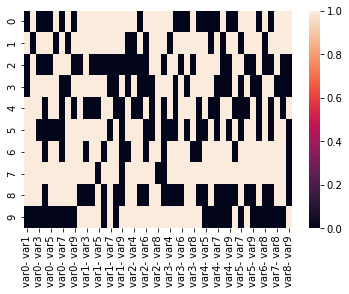

In [9]:
df_pred, df_real,df_res, hit_mean, hit_per_spread =spread_pred_interpretation(YLSTM, Y_real,plot=True)

In [10]:
print('Mean Hit', hit_mean)
print('Hit per spread', hit_per_spread)

Mean Hit 0.5933333333333334
Hit per spread [0.6 0.8 0.6 0.3 0.6 0.7 0.4 0.7 0.6 0.8 0.7 0.7 0.7 0.6 0.7 0.5 0.4 0.6
 0.7 0.5 0.4 0.7 0.9 0.4 0.7 0.5 0.7 0.7 0.8 0.5 0.6 0.6 0.4 0.5 0.4 0.6
 0.5 0.7 0.6 0.5 0.6 0.4 0.8 0.6 0.4]


In [11]:
print('The rmse of prediction is:', mean_squared_error(MultiY[(np.size(X,axis=0)-N_pred):,:], YLSTM) ** 0.5)
print('The mae of prediction is:', mean_absolute_error(MultiY[(np.size(X,axis=0) - N_pred):,:], YLSTM))

The rmse of prediction is: 1.3006133719732282
The mae of prediction is: 1.03019213755877


In [12]:
YVAR,Yreal = pred_VAR_VARMA(dataset['data'],N_test=N_pred)

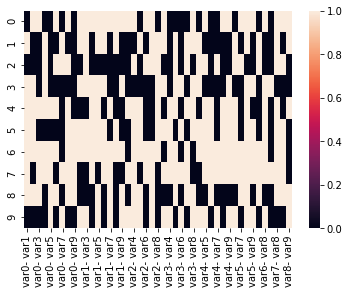

In [13]:
df_pred, df_real,df_res, hit_mean, hit_per_spread =spread_pred_interpretation(YVAR, Y_real,plot=True)

In [14]:
print('Mean Hit', hit_mean)
print('Hit per spread', hit_per_spread)

Mean Hit 0.58
Hit per spread [0.7 0.6 0.5 0.6 0.5 0.5 0.4 0.7 0.4 0.6 0.7 0.6 0.8 0.6 0.6 0.4 0.5 0.4
 0.8 0.6 0.4 0.7 0.6 0.6 0.5 0.7 0.4 0.6 0.7 0.6 0.7 0.5 0.4 0.5 0.7 0.7
 0.5 0.9 0.6 0.5 0.7 0.2 0.8 0.6 0.5]


In [15]:
print('The rmse of prediction is:', mean_squared_error(MultiY[(np.size(X,axis=0)-N_pred):,:], YVAR) ** 0.5)
print('The mae of prediction is:', mean_absolute_error(MultiY[(np.size(X,axis=0) - N_pred):,:], YVAR))

The rmse of prediction is: 1.2574772736056439
The mae of prediction is: 0.9986740950063266


In [16]:
YKer = pred_Kernel_Ridge(X, MultiY,N_test=N_pred)

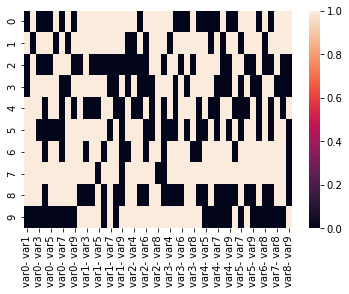

In [17]:
df_pred, df_real,df_res, hit_mean, hit_per_spread =spread_pred_interpretation(YLSTM, Y_real,plot=True)

In [18]:
print('Mean Hit', hit_mean)
print('Hit per spread', hit_per_spread)

Mean Hit 0.5933333333333334
Hit per spread [0.6 0.8 0.6 0.3 0.6 0.7 0.4 0.7 0.6 0.8 0.7 0.7 0.7 0.6 0.7 0.5 0.4 0.6
 0.7 0.5 0.4 0.7 0.9 0.4 0.7 0.5 0.7 0.7 0.8 0.5 0.6 0.6 0.4 0.5 0.4 0.6
 0.5 0.7 0.6 0.5 0.6 0.4 0.8 0.6 0.4]


In [19]:
print('The rmse of prediction is:', mean_squared_error(MultiY[(np.size(X,axis=0) - N_pred):,:], YKer) ** 0.5)
print('The mae of prediction is:', mean_absolute_error(MultiY[(np.size(X,axis=0) - N_pred):,:], YKer))

The rmse of prediction is: 1.1824180279027856
The mae of prediction is: 0.9400060431658716


In [4]:
Y_HMM_GMM, Y_HMM_GMM_means, Cov, Prec = pred_HMM_GMM(dataset['data'],K=N_states,N_test = N_pred, meth = 'viterbi')

100%|██████████| 20/20 [33:24<00:00, 100.23s/it]


In [9]:
import pickle
with open('Res_exp_pred.pickle', 'wb') as f:
    pickle.dump([Y_HMM_GMM, Cov, Prec,Y_real,dataset], f)

In [7]:
Cov

{'0': array([[ 1.32115754e+00,  2.31755480e-02, -8.85401425e-06,
         -6.48101754e-04, -5.02370503e-04, -4.84316570e-02,
          4.12895537e-05, -1.75288551e-01,  9.06864017e-05,
          6.62211806e-03],
        [ 2.31755480e-02,  1.23090788e+00, -4.70257530e-04,
         -3.44222091e-02, -8.81250820e-06, -8.49580882e-04,
          7.24295173e-07, -1.53643546e-01,  4.81656817e-03,
          1.16164204e-04],
        [-8.85401425e-06, -4.70257530e-04,  1.05863513e+00,
          1.25403662e-02,  3.36674106e-09,  3.24574902e-07,
         -2.76710463e-10,  5.86981653e-05, -1.00674735e-01,
         -4.43795128e-08],
        [-6.48101754e-04, -3.44222091e-02,  1.25403662e-02,
          9.17937682e-01,  2.46440862e-07,  2.37584397e-05,
         -2.02548381e-08,  4.29662555e-03, -1.28443512e-01,
         -3.24851971e-06],
        [-5.02370503e-04, -8.81250820e-06,  3.36674123e-09,
          2.46440862e-07,  1.10515428e+00,  1.12775831e-02,
         -9.08320190e-02,  6.66535173e-05, -3.4

In [2]:
import pickle
with open('Res_exp_pred.pickle', 'rb') as f:
   [Y_HMM_GMM, Cov, Prec,Y_real,dataset] =  pickle.load(f)

In [2]:
dataset

{'data': array([[-1.42605006,  1.43995938, -1.45677296, ..., -1.23776754,
         -1.43390749,  3.42157311],
        [-0.04032928, -0.98323318, -0.11112296, ..., -0.76630738,
          2.22117533,  2.75889005],
        [-2.12095034, -2.09759669, -2.20536722, ..., -0.91636701,
         -1.05017186,  3.50066131],
        ...,
        [-0.54351004,  0.37985895, -1.99313658, ...,  1.27826498,
         -1.48592792, -0.7866137 ],
        [ 0.06902068,  0.55424261,  0.38306047, ...,  0.11132824,
          0.0373987 , -1.03835698],
        [ 2.07894487, -0.62182939, -2.4289504 , ...,  0.59956036,
          1.05980499, -1.63273829]]),
 'thetas': [array([[1.  , 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.25, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  ],
         [0.25, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25],
         [0.  , 0.  , 0.  , 1.  , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.25, 1.  , 0.25, 0.  , 0.  , 0.  , 0.  ],


In [12]:
Y_real

array([[-0.24159647, -1.03751004, -0.80580493, -0.90964571,  1.30592892,
        -1.26625468, -2.39691351, -0.09519898,  0.39499927, -0.67547518],
       [-0.43752793, -1.12115429, -1.21601461,  0.14267507, -0.1755006 ,
        -1.32191547, -1.15552424,  0.47192632,  0.82919337,  1.69972794],
       [-0.54351004,  0.37985895, -1.99313658,  0.26761994, -2.32633037,
        -0.39458745,  0.32778553,  1.27826498, -1.48592792, -0.7866137 ],
       [ 0.06902068,  0.55424261,  0.38306047, -0.59041085, -1.51300681,
        -0.685257  , -2.49618513,  0.11132824,  0.0373987 , -1.03835698],
       [ 2.07894487, -0.62182939, -2.4289504 , -1.43309147,  0.2242198 ,
        -1.60159206, -0.42712551,  0.59956036,  1.05980499, -1.63273829]])

In [11]:
print(Cov['2'],dataset['covariances'][1])

[[ 1.31938014e+00  2.35401294e-02 -9.74173778e-06 -7.14310100e-04
  -4.76843360e-04 -4.69926245e-02  3.95375218e-05 -1.75602995e-01
   9.94542354e-05  6.44605044e-03]
 [ 2.35401294e-02  1.23812959e+00 -5.12381797e-04 -3.75702468e-02
  -8.50774851e-06 -8.38433465e-04  7.05420942e-07 -1.55296531e-01
   5.23094965e-03  1.15009205e-04]
 [-9.74173778e-06 -5.12381797e-04  1.05552991e+00  1.24910330e-02
   3.52080742e-09  3.46973410e-07 -2.91928447e-10  6.42671950e-05
  -1.00677863e-01 -4.75948748e-08]
 [-7.14310100e-04 -3.75702468e-02  1.24910330e-02  9.15901373e-01
   2.58162162e-07  2.54417247e-05 -2.14055449e-08  4.71237345e-03
  -1.27522025e-01 -3.48988044e-06]
 [-4.76843360e-04 -8.50774851e-06  3.52080729e-09  2.58162162e-07
   1.10634856e+00  1.10022392e-02 -9.17330178e-02  6.34655014e-05
  -3.59442217e-08 -9.18946781e-02]
 [-4.69926245e-02 -8.38433465e-04  3.46973410e-07  2.54417247e-05
   1.10022392e-02  1.08426402e+00 -9.12251927e-04  6.25448674e-03
  -3.54228126e-06 -1.48730160e-01

In [5]:
dataset['states']

array([0, 0, 0, 0, 0, 0, 2, 1, 3, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3,
       0, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3,
       3, 1, 3, 4, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0,
       2, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,

Precision: real 0.25 pred 0.12383492933548676
Covariance: real -0.30940988835725675 pred 9.068640172334164e-05
Precision: real 0.25 pred 0.14962100219597693
Covariance: real -0.3094098883572569 pred -0.03442220906052757
Precision: real 0.25 pred 0.10864857264223557
Covariance: real -0.30940988835725725 pred 0.012540366180295203
Precision: real 0.25 pred 0.15268716290244275
Covariance: real -0.30940988835725625 pred 3.2457490239112434e-07
Precision: real 0.25 pred 0.155533192799118
Covariance: real -0.3094098883572566 pred 0.01127758313451535
Precision: real 0.25 pred 0.13402087325723758
Covariance: real -0.30940988835725713 pred 6.665351730680549e-05
Precision: real 0.25 pred 0.12544961352744835
Covariance: real -0.30940988835725675 pred -0.15524642416994314
Precision: real 0.25 pred 0.1506586991533008
Covariance: real -0.3094098883572569 pred -0.1920182895947188
Precision: real 0.25 pred 0.10951707995244983
Covariance: real -0.30940988835725725 pred -0.14340051047819272
Precision: rea

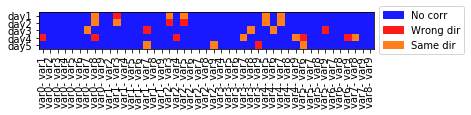

In [4]:
df_pred, df_real,df_res, hit_mean, hit_per_spread =spread_pred_interpretation(Y_HMM_GMM,
                                                                              Y_real,
                                                                              prec = Prec,
                                                                              cov = Cov,
                                                                              dataset=dataset,
                                                                              met_pred = 'hmm_gmm',
                                                                              plot=True)

In [8]:
print('Mean Hit', hit_mean)
print('Hit per spread', hit_per_spread)

Mean Hit 0.5555555555555556
Hit per spread [0.7 0.6 0.6 0.3 0.6 0.5 0.6 0.5 0.3 0.5 0.4 0.7 0.4 0.3 0.3 0.6 0.5 0.8
 0.5 0.4 0.8 0.5 0.5 0.6 0.7 0.4 0.6 0.4 0.6 0.5 0.6 0.4 0.7 0.6 0.6 0.7
 0.6 0.6 0.5 0.7 0.7 0.6 0.7 0.6 0.7]


In [9]:
print('The rmse of prediction is:', mean_squared_error(MultiY[(np.size(X,axis=0) - N_pred):,:], Y_HMM_GMM) ** 0.5)
print('The mae of prediction is:', mean_absolute_error(MultiY[(np.size(X,axis=0) - N_pred):,:], Y_HMM_GMM))

The rmse of prediction is: 2.052233208168304
The mae of prediction is: 1.5423101260833814
